# Linear Regression Assignment

In [1]:
# Importing all required packages & set global options
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

/Users/stray/miniconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/stray/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/stray/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence


In [2]:
# Import Dataset into Python
data = pd.read_csv('./CarPrice_Assignment.csv')

In [3]:
# Skim through the data
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

## Start Exploratory Data Analysis

In [4]:
# Check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
# Quickly check distribution of numerical columns
data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

### Check for Duplicates
None Found

In [6]:
data["car_ID"].value_counts()[data["car_ID"].value_counts() > 1]

Series([], Name: car_ID, dtype: int64)

### Drop Car_ID
Car_ID can be dropped since it is a unique ID with no predictive value

In [7]:
data.drop("car_ID", inplace = True, axis = 1)

### Understand the target variable: Price
- Car prices right-skewed; median < mean (from describe method used above)
- 90% of cars priced at or below USD 22,563

/Users/stray/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


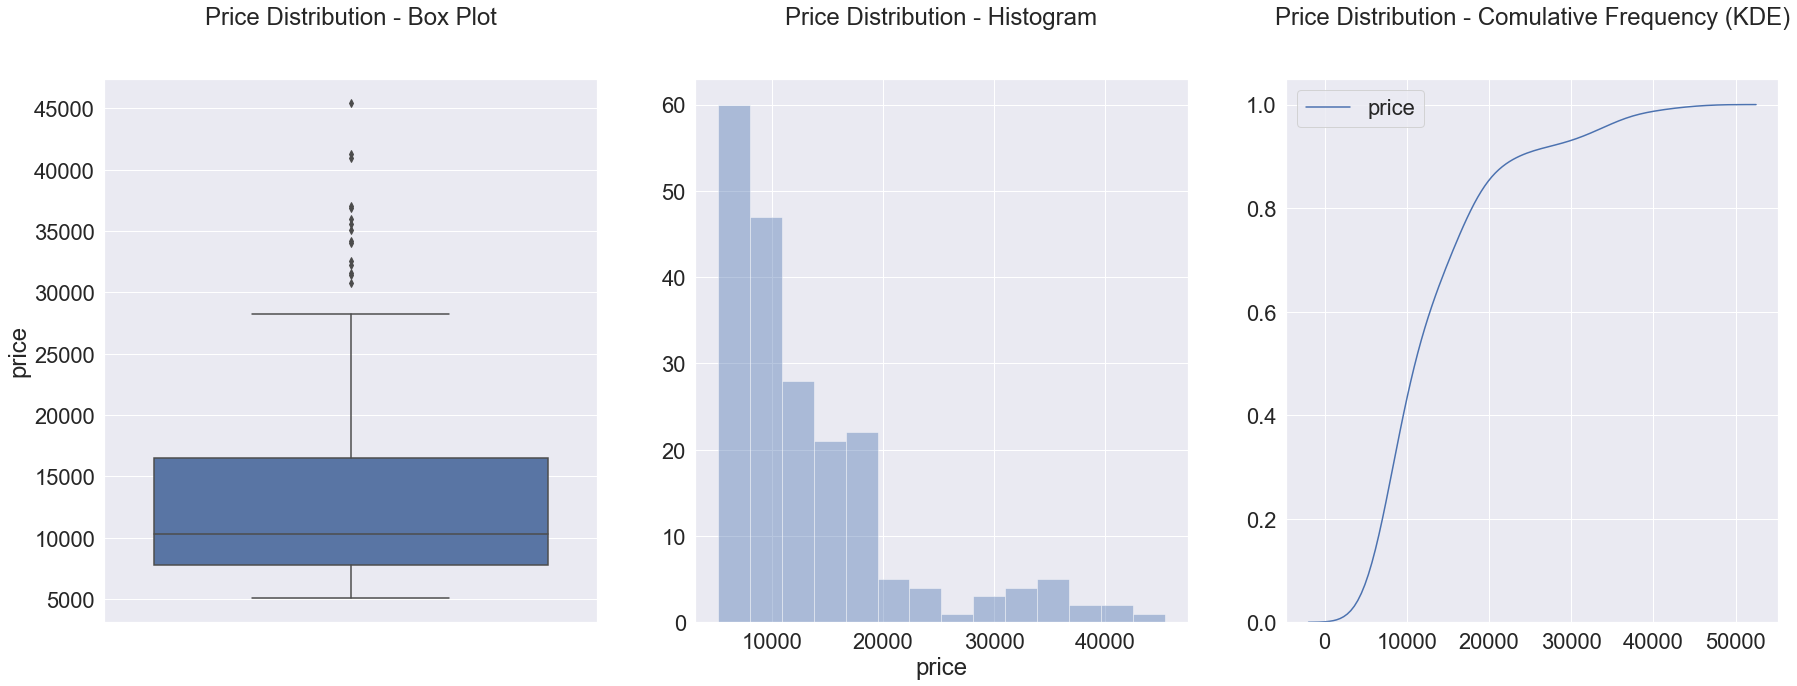

25th Percentile Price value is: 7788.0
75th Percentile Price value is: 16503.0
90th Percentile Price value is: 22563.0
95th Percentile Price value is: 32472.399999999994
Min Value (Box Plot) of Price is : -5284.5
Max Value (Box Plot) of Price is : 29575.5
Number of Lower Range Price Outliers: 0 (0.0%)
Number of Upper Range Price Outliers: 15 (7.32%)


In [8]:
# Understand the target variable: Price

sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=2)

plt.subplot(1, 3, 1)
g = sns.boxplot(data["price"], orient='v')
g.text(0.5, 1.1, "Price Distribution - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 2)
g = sns.distplot(data["price"], kde=False)
g.text(0.5, 1.1, "Price Distribution - Histogram", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 3)
g = sns.kdeplot(data["price"], cumulative=True)
g.text(0.5, 1.1, "Price Distribution - Comulative Frequency (KDE)", size=24, ha="center", transform=g.transAxes)

plt.show()

p_25 = np.percentile(data["price"], 25)
p_75 = np.percentile(data["price"], 75)
IQR = p_75 - p_25
min_box = p_25 - 1.5*IQR
max_box = p_75 + 1.5*IQR
print('25th Percentile Price value is: ' + str(p_25))
print('75th Percentile Price value is: ' + str(p_75))
print('90th Percentile Price value is: ' + str(np.percentile(data["price"], 90)))
print('95th Percentile Price value is: ' + str(np.percentile(data["price"], 95)))
print('Min Value (Box Plot) of Price is : ' + str(min_box))
print('Max Value (Box Plot) of Price is : ' + str(max_box))
print('Number of Lower Range Price Outliers: ' + str(len(data[data["price"] < min_box]))
      + ' (' + str(np.round(len(data[data["price"] < min_box])/len(data)*100,2)) +'%)')
print('Number of Upper Range Price Outliers: ' + str(len(data[data["price"] > max_box]))
      + ' (' + str(np.round(len(data[data["price"] > max_box])/len(data)*100,2)) +'%)')

### Understand column Symboling
- From the Price Box Plots by Symboling Values, appears that price median within each group is different, suggesting a relationship between Symboling values
- However, as-is, this relationship looks non-linear i.e. as symboling increases from -2 to +3, price change is not linear
- Hence would be useful to encode symboling differently
- Also, since very few (< 2%) had symboling = -2, grouping symboling -1 and -2 makes sense

/Users/stray/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


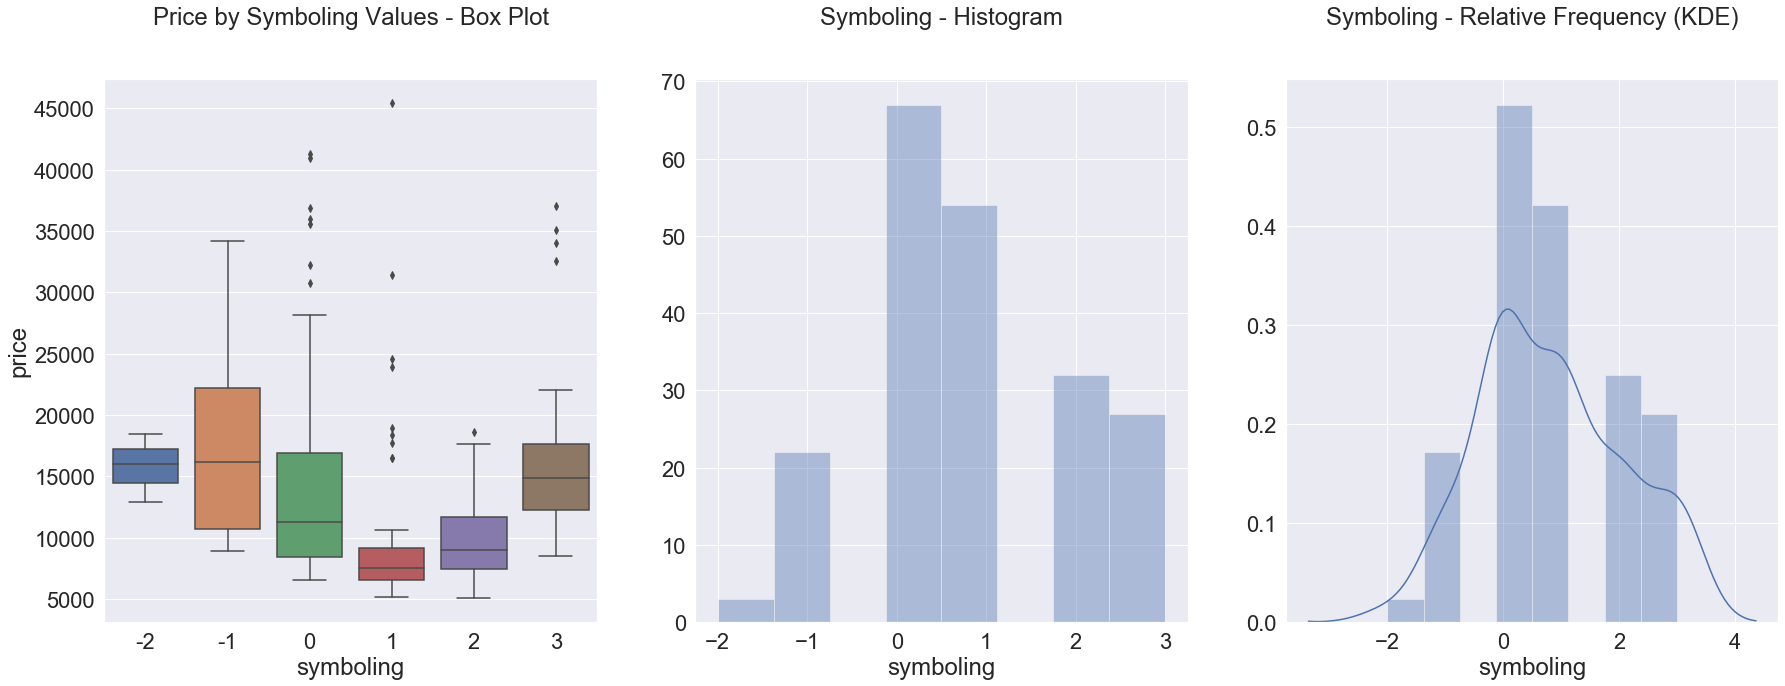

/Users/stray/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


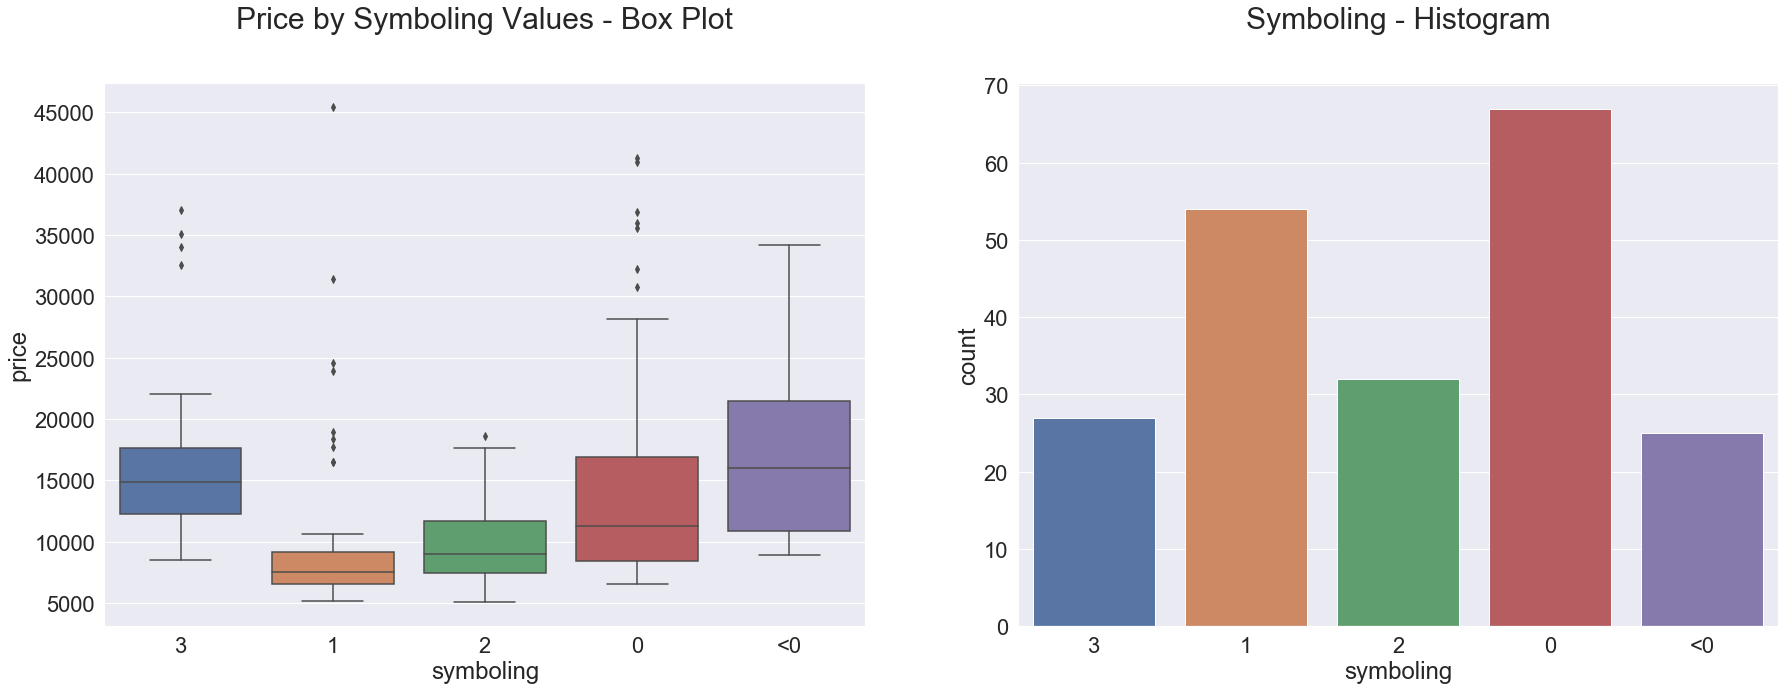

In [9]:
# visualise data
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=2)

plt.subplot(1, 3, 1)
g = sns.boxplot(y="price", x="symboling",data=data)
g.text(0.5, 1.1, "Price by Symboling Values - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 2)
g = sns.distplot(data["symboling"], kde=False)
g.text(0.5, 1.1, "Symboling - Histogram", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 3)
g = sns.distplot(data["symboling"], kde=True)
g.text(0.5, 1.1, "Symboling - Relative Frequency (KDE)", size=24, ha="center", transform=g.transAxes)

plt.show()

# group symboling < 0 cars
data["symboling"][data["symboling"] < 0] = '<0'

# visualise data again post grouping
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=2)

plt.subplot(1, 2, 1)
g = sns.boxplot(y="price", x="symboling",data=data)
g.text(0.5, 1.1, "Price by Symboling Values - Box Plot", size=30, ha="center", transform=g.transAxes)

plt.subplot(1, 2, 2)
g = sns.countplot(data["symboling"])
g.text(0.5, 1.1, "Symboling - Histogram", size=30, ha="center", transform=g.transAxes)

plt.show()

# perform encoding of symboling using get_dummies function (one-hot encoding) when treating multi-level categoricals

### Understand column CarName
- As-is, the granularity of the CarName column is too high for use; however, it contains Car's Brand name
- Brand names required correction of mis-spellings and short-forms
- Reviewing the price box-plots by brand + given the high-granularity of Brand data as well, makes sense to group brand into three groups: Median > USD 20K (high-end), Median between USD 10K and 20K (mid-range), Median <= USD 10 K (value)
- Post this treatment, we won't need the highly granular CarName or Brand variables

TOYOTA         31
NISSAN         18
MAZDA          15
MITSUBISHI     13
HONDA          13
SUBARU         12
PEUGEOT        11
VOLVO          11
DODGE           9
VOLKSWAGEN      9
BUICK           8
BMW             8
PLYMOUTH        7
AUDI            7
SAAB            6
ISUZU           4
PORSCHE         4
CHEVROLET       3
ALFA-ROMERO     3
JAGUAR          3
MAXDA           2
VW              2
RENAULT         2
VOKSWAGEN       1
PORCSHCE        1
TOYOUTA         1
MERCURY         1
Name: Brand, dtype: int64


/Users/stray/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/stray/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/stray/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

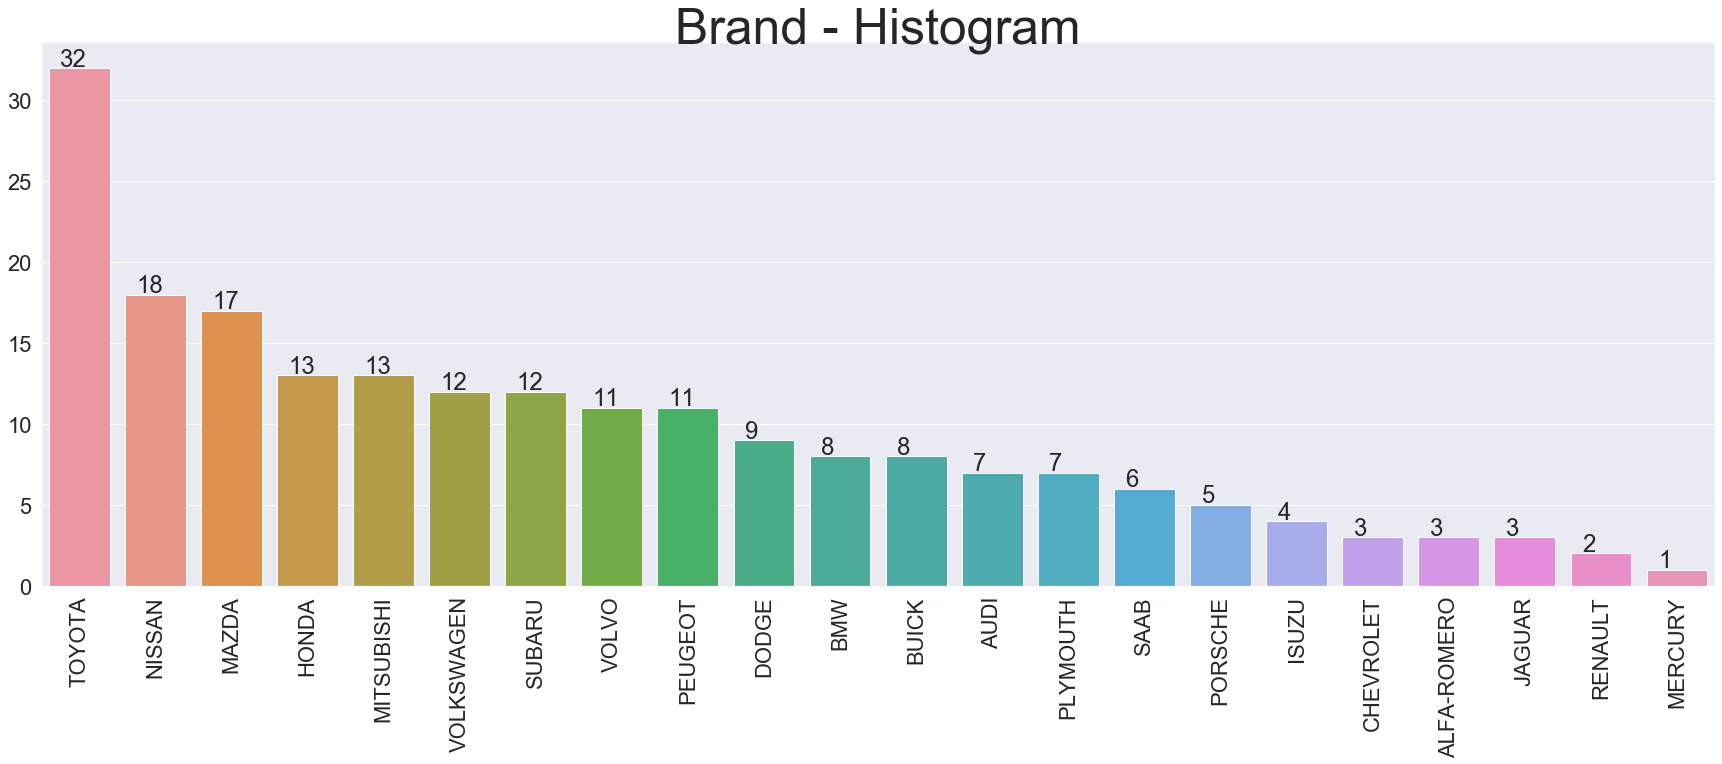

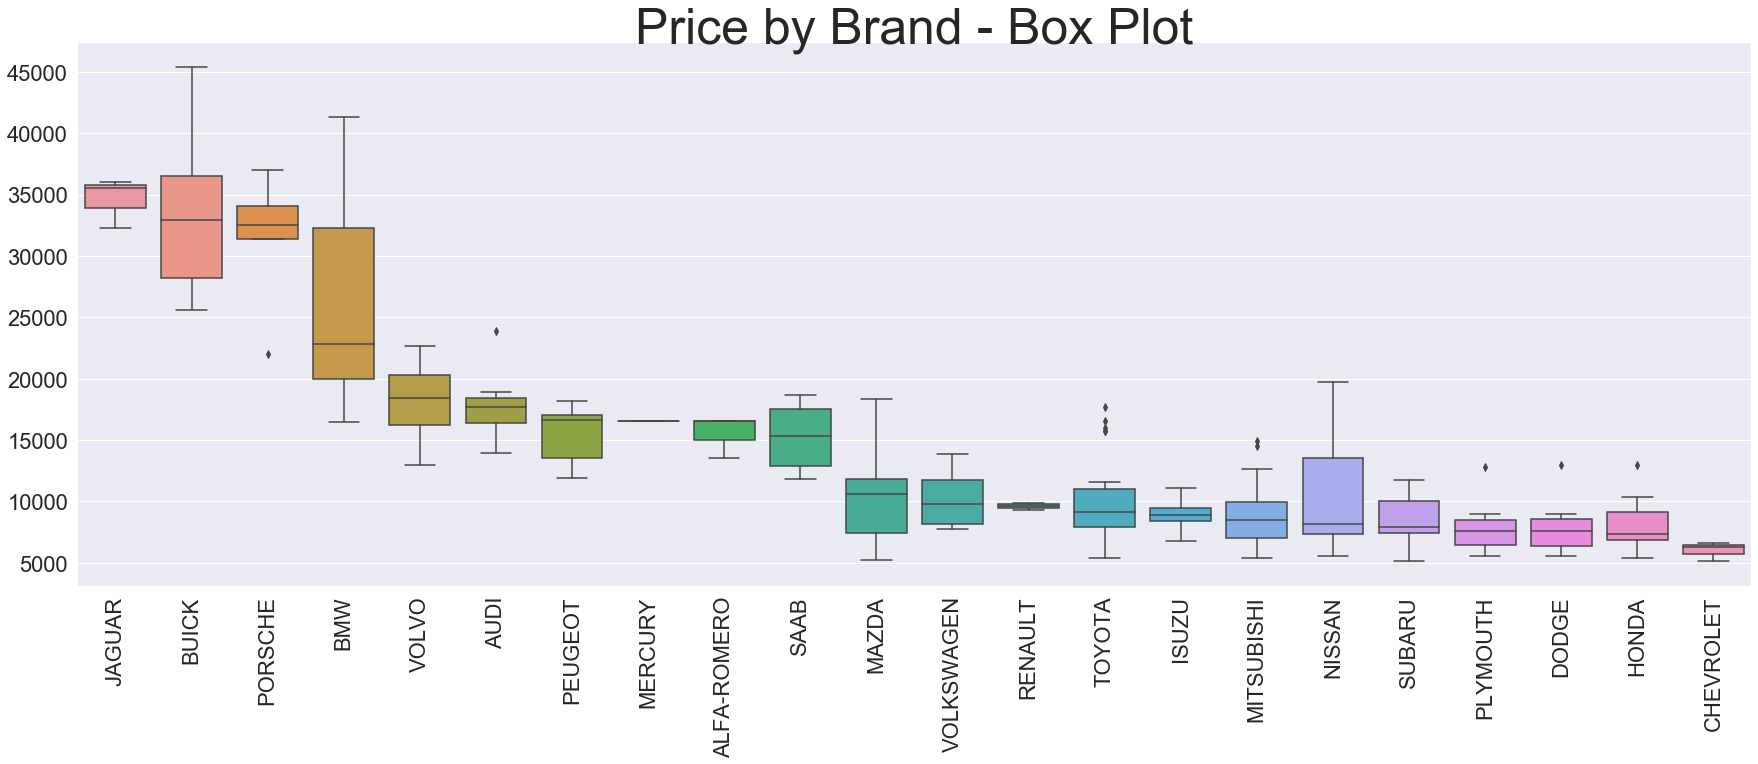

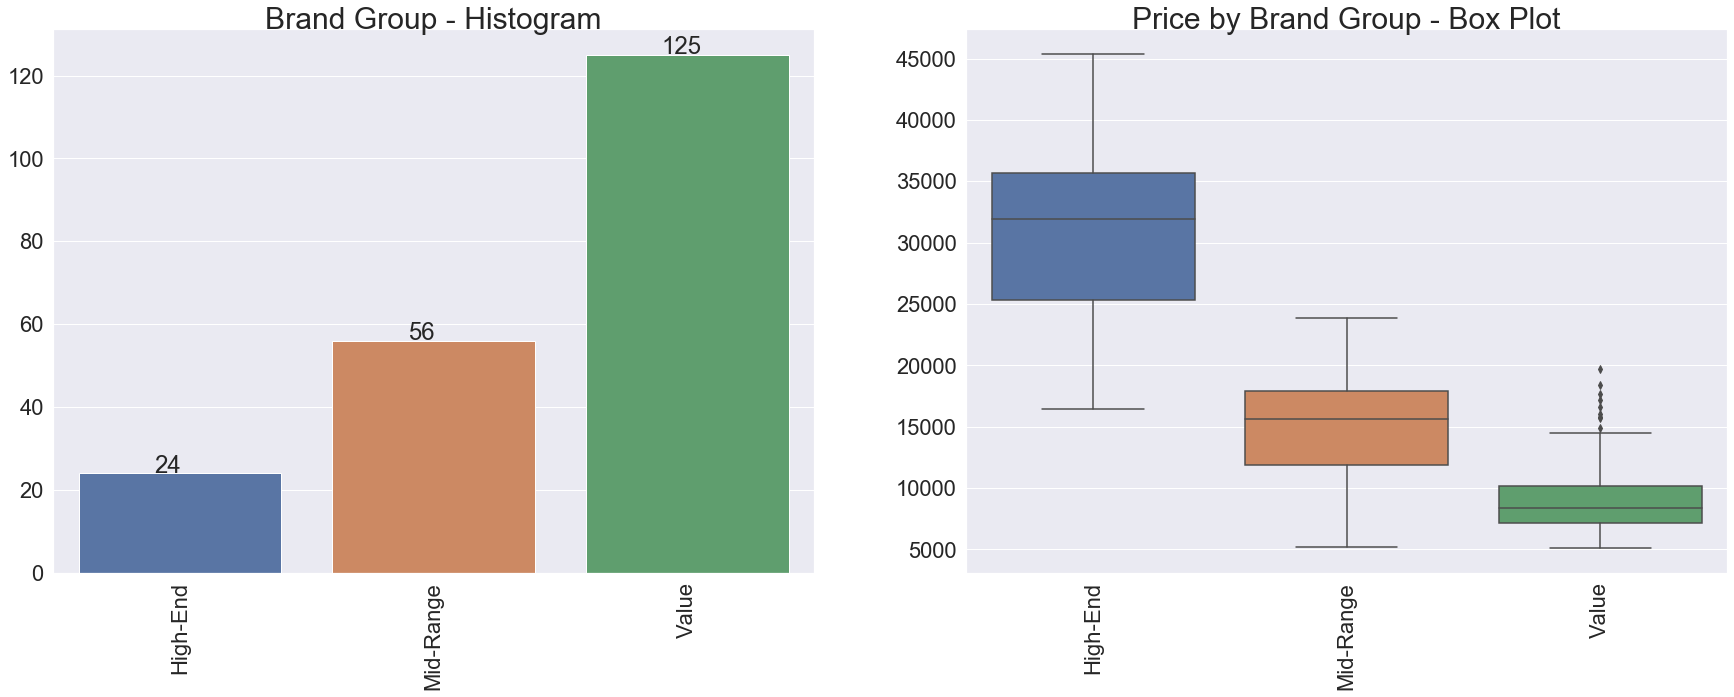

<Figure size 1440x720 with 0 Axes>

In [10]:
# Review some sample CarName values
data["CarName"].head()

# Extraxt and Analyse Brand
data["Brand"] = data["CarName"].str.split(' ').str.get(0).str.upper()
print(data["Brand"].value_counts())

# Correct mis-spellings and short-forms
data["Brand"][data["Brand"] == 'TOYOUTA'] = 'TOYOTA'
data["Brand"][data["Brand"] == 'MAXDA'] = 'MAZDA'
data["Brand"][data["Brand"] == 'VW'] = 'VOLKSWAGEN'
data["Brand"][data["Brand"] == 'VOKSWAGEN'] = 'VOLKSWAGEN'
data["Brand"][data["Brand"] == 'PORCSHCE'] = 'PORSCHE'

# visualise data - histogram
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=2)
g = sns.countplot(data["Brand"], order=data["Brand"].value_counts().index)
g.text(0.5, 1, "Brand - Histogram", size=50, ha="center", transform=g.transAxes)
for item in g.get_xticklabels():
    item.set_rotation(90)
for p, label in zip(g.patches, data["Brand"].value_counts()):
    g.annotate(label, (p.get_x()+0.15, p.get_height()+0.15))
g.set_ylabel('')    
g.set_xlabel('')
plt.show()
plt.tight_layout()

# visualise data - price distributions
brand_median_prices = data.groupby("Brand").price.median().sort_values(ascending=False)
g = sns.boxplot(y="price", x="Brand",data=data, order=brand_median_prices.index)
for item in g.get_xticklabels():
    item.set_rotation(90)
g.text(0.5, 1, "Price by Brand - Box Plot", size=50, ha="center", transform=g.transAxes)
g.set_ylabel('')    
g.set_xlabel('')
plt.show()
plt.tight_layout()

# group brands based on median price
brand_med_price_dict = brand_median_prices.to_dict()

def get_brand_group(x):
    if brand_med_price_dict[x] > 20000:
        return "High-End"
    elif brand_med_price_dict[x] > 10000:
        return "Mid-Range"
    else:
        return "Value"

data["Brand_Group"] = data["Brand"].apply(get_brand_group)

# visualise data - by brand group
sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale=2)

# histogram by brand group
plt.subplot(1, 2, 1)
g = sns.countplot(data["Brand_Group"], order=["High-End", "Mid-Range", "Value"])
g.text(0.5, 1, "Brand Group - Histogram", size=30, ha="center", transform=g.transAxes)
for item in g.get_xticklabels():
    item.set_rotation(90)
for p, label in zip(g.patches, data["Brand_Group"].value_counts().sort_values(ascending=True)):
    g.annotate(label, (p.get_x()+0.3, p.get_height()+0.15))
g.set_ylabel('')    
g.set_xlabel('')

# price distributions by brand group
plt.subplot(1, 2, 2)
g = sns.boxplot(y="price", x="Brand_Group",data=data, order=["High-End", "Mid-Range", "Value"])
for item in g.get_xticklabels():
    item.set_rotation(90)
g.text(0.5, 1, "Price by Brand Group - Box Plot", size=30, ha="center", transform=g.transAxes)
g.set_ylabel('')    
g.set_xlabel('')
plt.show()
plt.tight_layout()

# remove CarName and brand
data.drop(["CarName", "Brand"], inplace = True, axis = 1)

# perform encoding of brand group using get_dummies function (one-hot encoding) when treating multi-level categoricals

### Understand column fueltype
- More often than not, diesel vehicles are more expensive than gas vehicles
- Variable to be encoded as 0-1

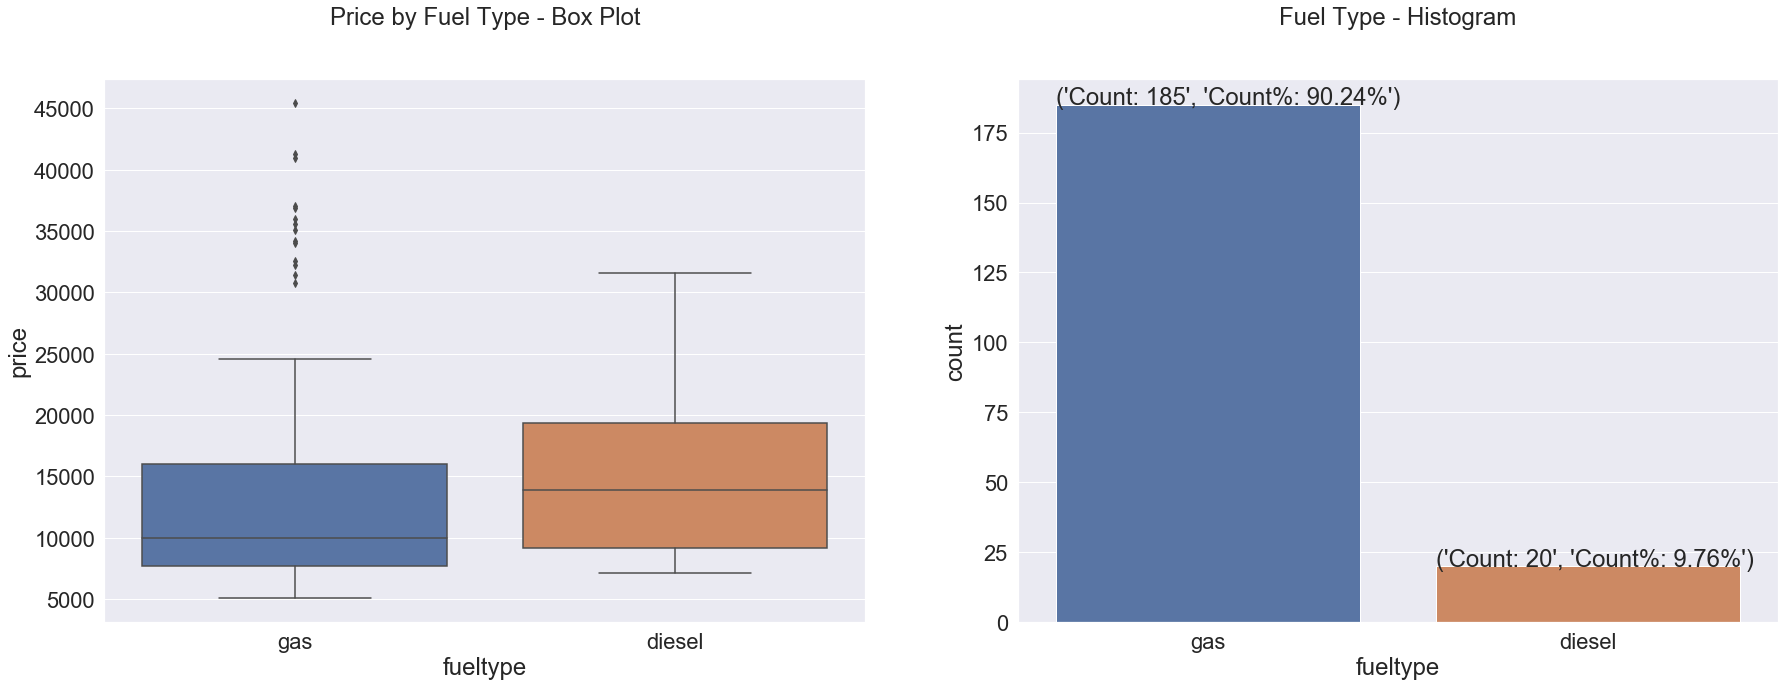

In [11]:
# visualise data
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=2)

plt.subplot(1, 2, 1)
g = sns.boxplot(y="price", x="fueltype",data=data, order=data["fueltype"].value_counts().index)
g.text(0.5, 1.1, "Price by Fuel Type - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 2, 2)
g = sns.countplot(data["fueltype"], order=data["fueltype"].value_counts().index)
g.text(0.5, 1.1, "Fuel Type - Histogram", size=24, ha="center", transform=g.transAxes)
for p, label in zip(g.patches, zip(data["fueltype"].value_counts().apply(lambda x: 'Count: ' + str(x)), 
            np.round(data["fueltype"].value_counts()/len(data)*100, 2).apply(lambda x: 'Count%: ' + str(x) + '%'))):
    g.annotate(label, (p.get_x(), p.get_height()+0.15))

plt.show()

# encode variable as 0-1
data["fueltype"] = data["fueltype"].apply(lambda x:0 if x=='gas' else 1)

### Understand column aspiration
- More often than not, turbo aspiration vehicles are more expensive than std aspiration vehicles
- Variable to be encoded as 0-1

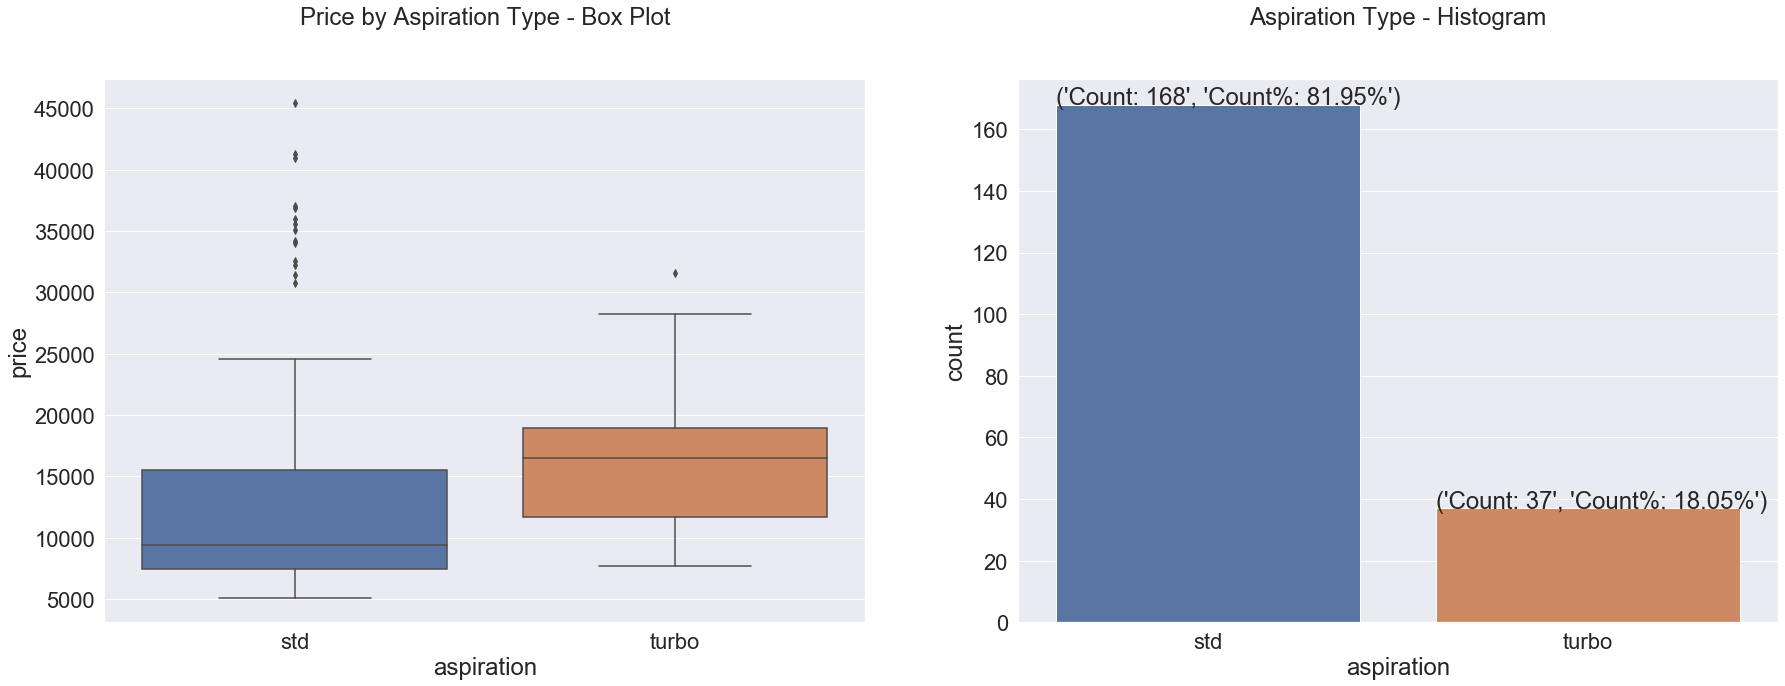

In [12]:
# visualise data
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=2)

plt.subplot(1, 2, 1)
g = sns.boxplot(y="price", x="aspiration",data=data, order=data["aspiration"].value_counts().index)
g.text(0.5, 1.1, "Price by Aspiration Type - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 2, 2)
g = sns.countplot(data["aspiration"], order=data["aspiration"].value_counts().index)
g.text(0.5, 1.1, "Aspiration Type - Histogram", size=24, ha="center", transform=g.transAxes)
for p, label in zip(g.patches, zip(data["aspiration"].value_counts().apply(lambda x: 'Count: ' + str(x)), 
            np.round(data["aspiration"].value_counts()/len(data)*100, 2).apply(lambda x: 'Count%: ' + str(x) + '%'))):
    g.annotate(label, (p.get_x(), p.get_height()+0.15))

plt.show()

# encode variable as 0-1
data["aspiration"] = data["aspiration"].apply(lambda x:0 if x=='std' else 1)

### Understand column doornumber
- Doornumber not making a huge difference to price (from a univariate perspective)
- Variable to be encoded as 0-1

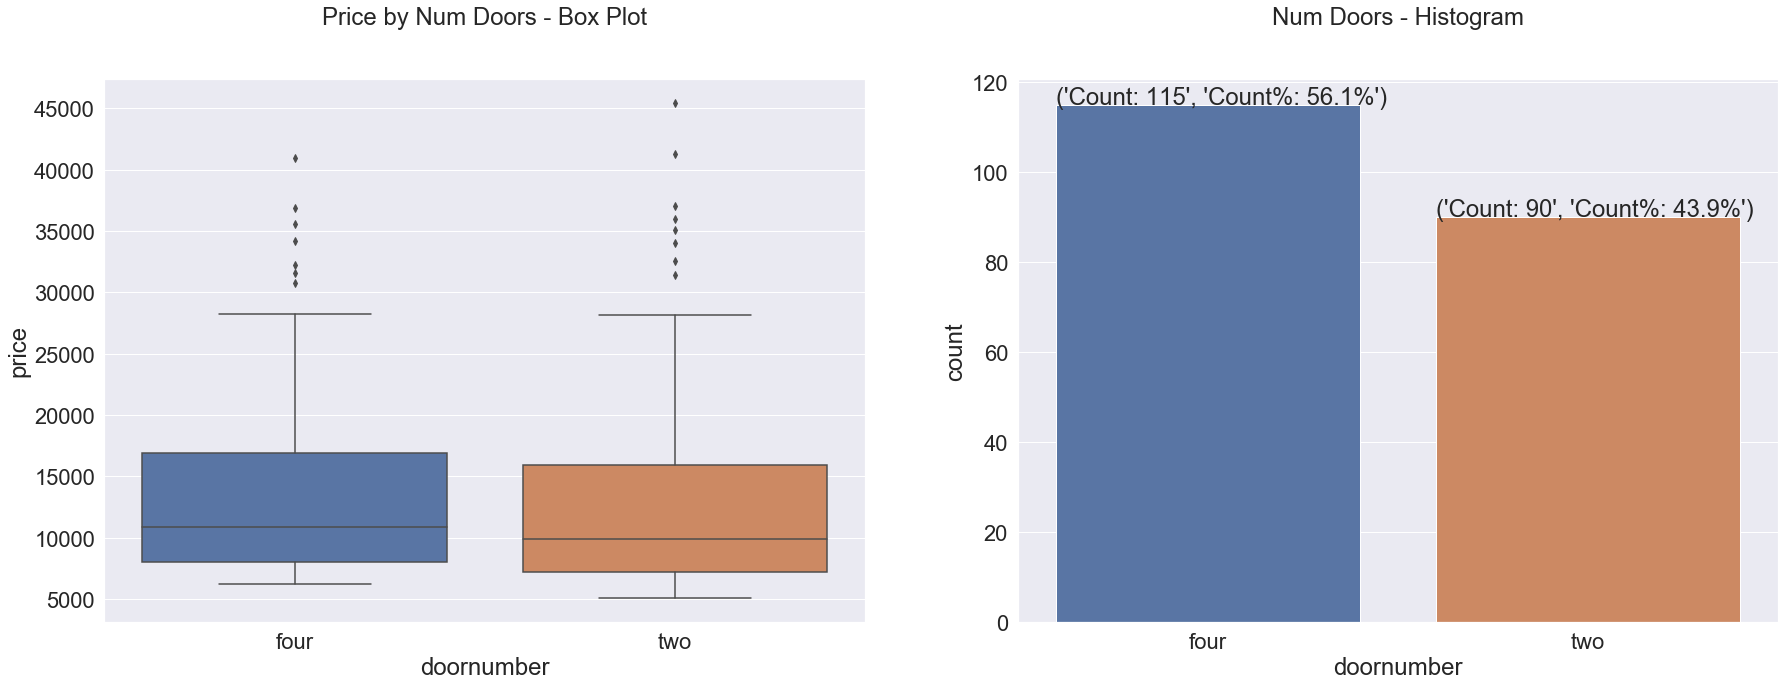

In [13]:
# visualise data
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=2)

plt.subplot(1, 2, 1)
g = sns.boxplot(y="price", x="doornumber",data=data, order=data["doornumber"].value_counts().index)
g.text(0.5, 1.1, "Price by Num Doors - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 2, 2)
g = sns.countplot(data["doornumber"], order=data["doornumber"].value_counts().index)
g.text(0.5, 1.1, "Num Doors - Histogram", size=24, ha="center", transform=g.transAxes)
for p, label in zip(g.patches, zip(data["doornumber"].value_counts().apply(lambda x: 'Count: ' + str(x)), 
            np.round(data["doornumber"].value_counts()/len(data)*100, 2).apply(lambda x: 'Count%: ' + str(x) + '%'))):
    g.annotate(label, (p.get_x(), p.get_height()+0.15))

plt.show()

# encode variable as 0-1
data["doornumber"] = data["doornumber"].apply(lambda x:0 if x=='two' else 1)

### Understand column carbody
- Hardtop/Convertibles have ~similar price distributions in that median for either type is higher than other types'
- There are too few hardtop/convertibles in the data; so group them

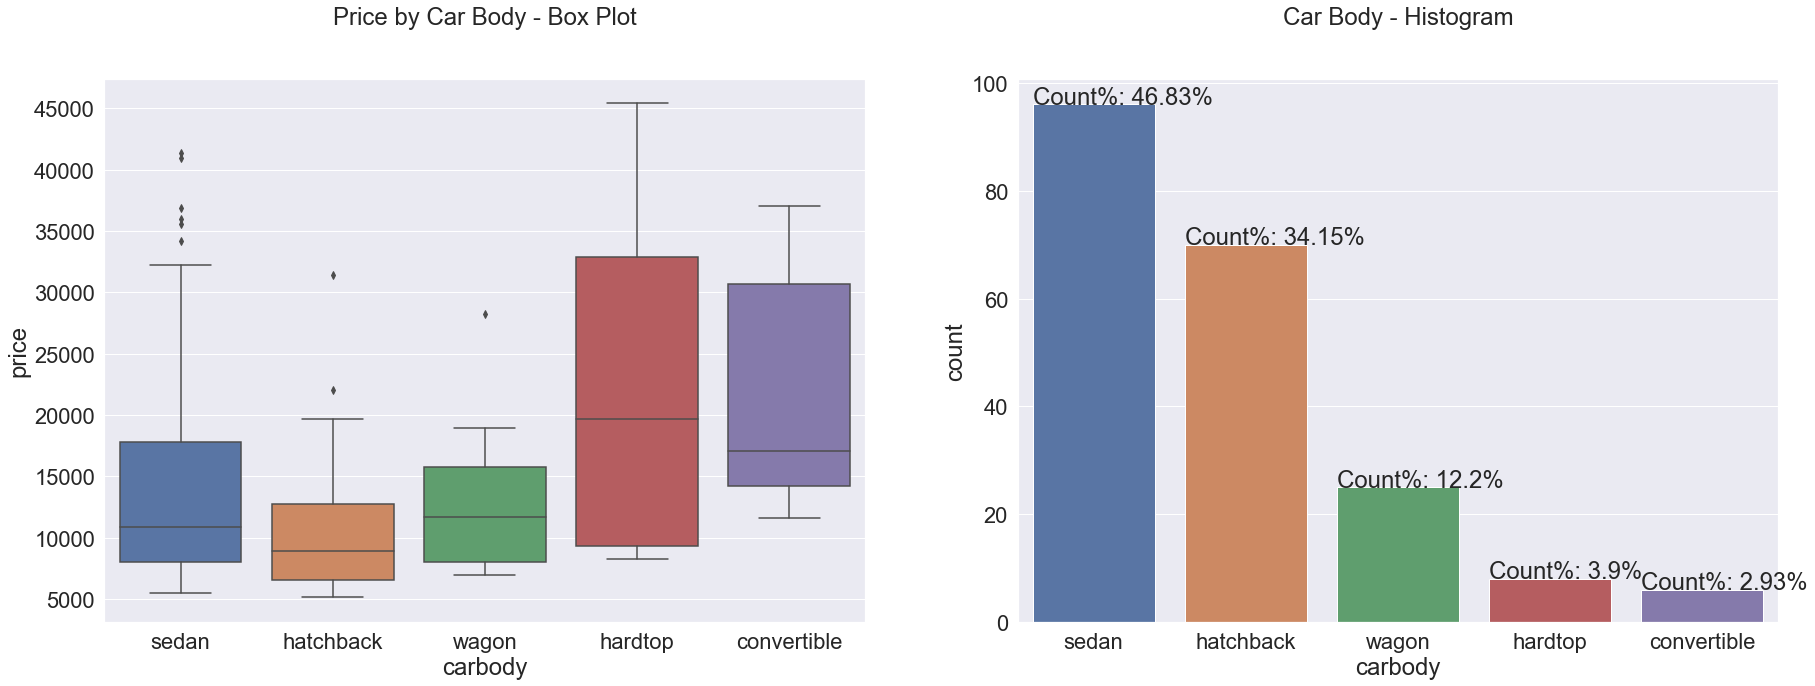

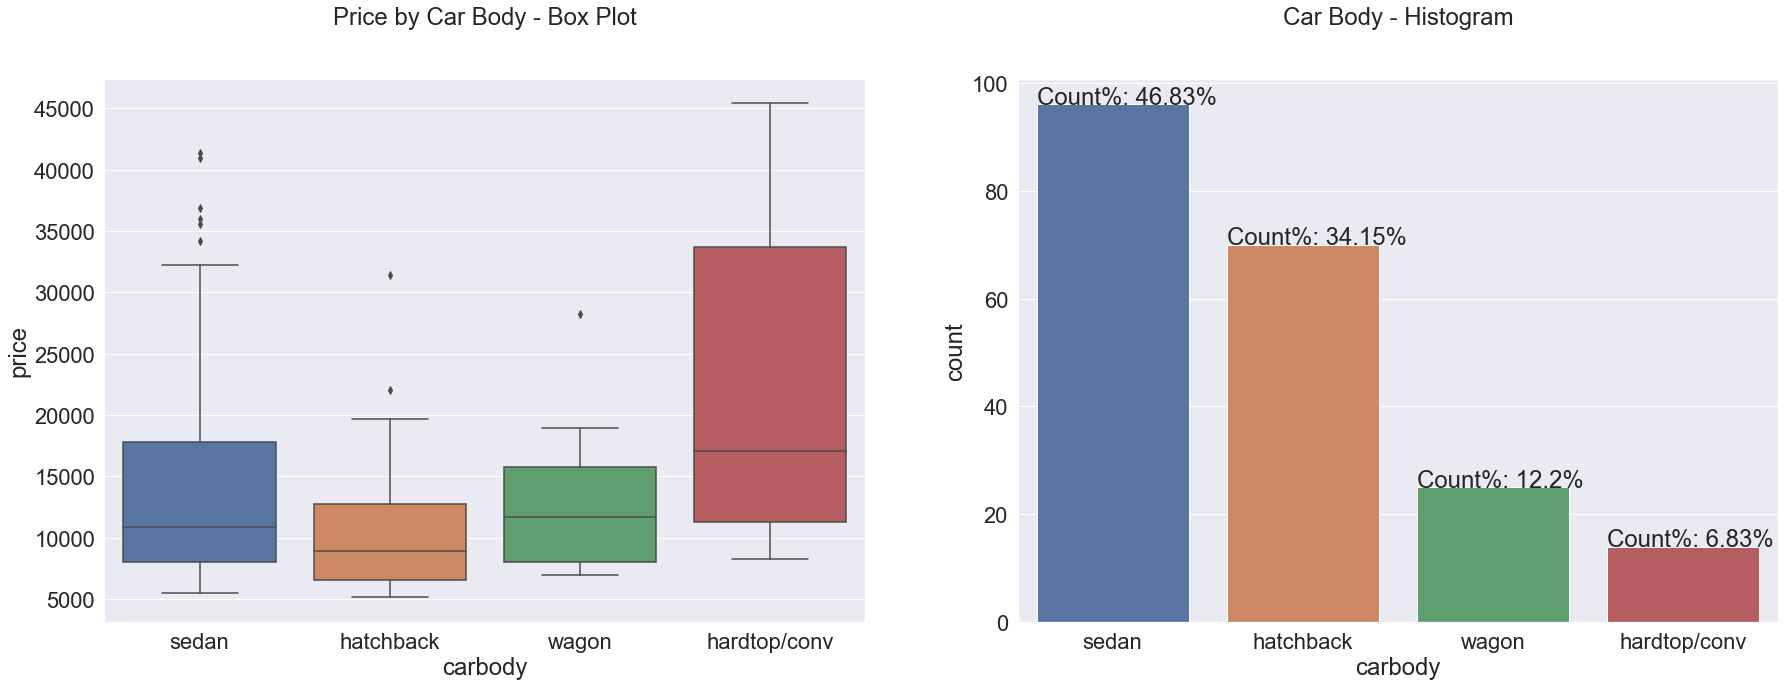

In [14]:
# visualise data
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=2)

plt.subplot(1, 2, 1)
g = sns.boxplot(y="price", x="carbody",data=data, order=data["carbody"].value_counts().index)
g.text(0.5, 1.1, "Price by Car Body - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 2, 2)
g = sns.countplot(data["carbody"], order=data["carbody"].value_counts().index)
g.text(0.5, 1.1, "Car Body - Histogram", size=24, ha="center", transform=g.transAxes)
for p, label in zip(g.patches,  
            np.round(data["carbody"].value_counts()/len(data)*100, 2).apply(lambda x: 'Count%: ' + str(x) + '%')):
    g.annotate(label, (p.get_x(), p.get_height()+0.15))

plt.show()

# group hardtop/convertible
data["carbody"] = data["carbody"].apply(lambda x:"hardtop/conv" if x=='hardtop' or x=='convertible' else x)

# visualise data again post grouping
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=2)

plt.subplot(1, 2, 1)
g = sns.boxplot(y="price", x="carbody",data=data, order=data["carbody"].value_counts().index)
g.text(0.5, 1.1, "Price by Car Body - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 2, 2)
g = sns.countplot(data["carbody"], order=data["carbody"].value_counts().index)
g.text(0.5, 1.1, "Car Body - Histogram", size=24, ha="center", transform=g.transAxes)
for p, label in zip(g.patches,  
            np.round(data["carbody"].value_counts()/len(data)*100, 2).apply(lambda x: 'Count%: ' + str(x) + '%')):
    g.annotate(label, (p.get_x(), p.get_height()+0.15))

plt.show()

# perform encoding of brand group using get_dummies function (one-hot encoding) when treating multi-level categoricals

### Understand column drivewheel
- Rear wheel drives are more often than not more expensive than forward wheel and four wheel drives
- Four wheel drives are more often than not more expensive than forward wheel drives

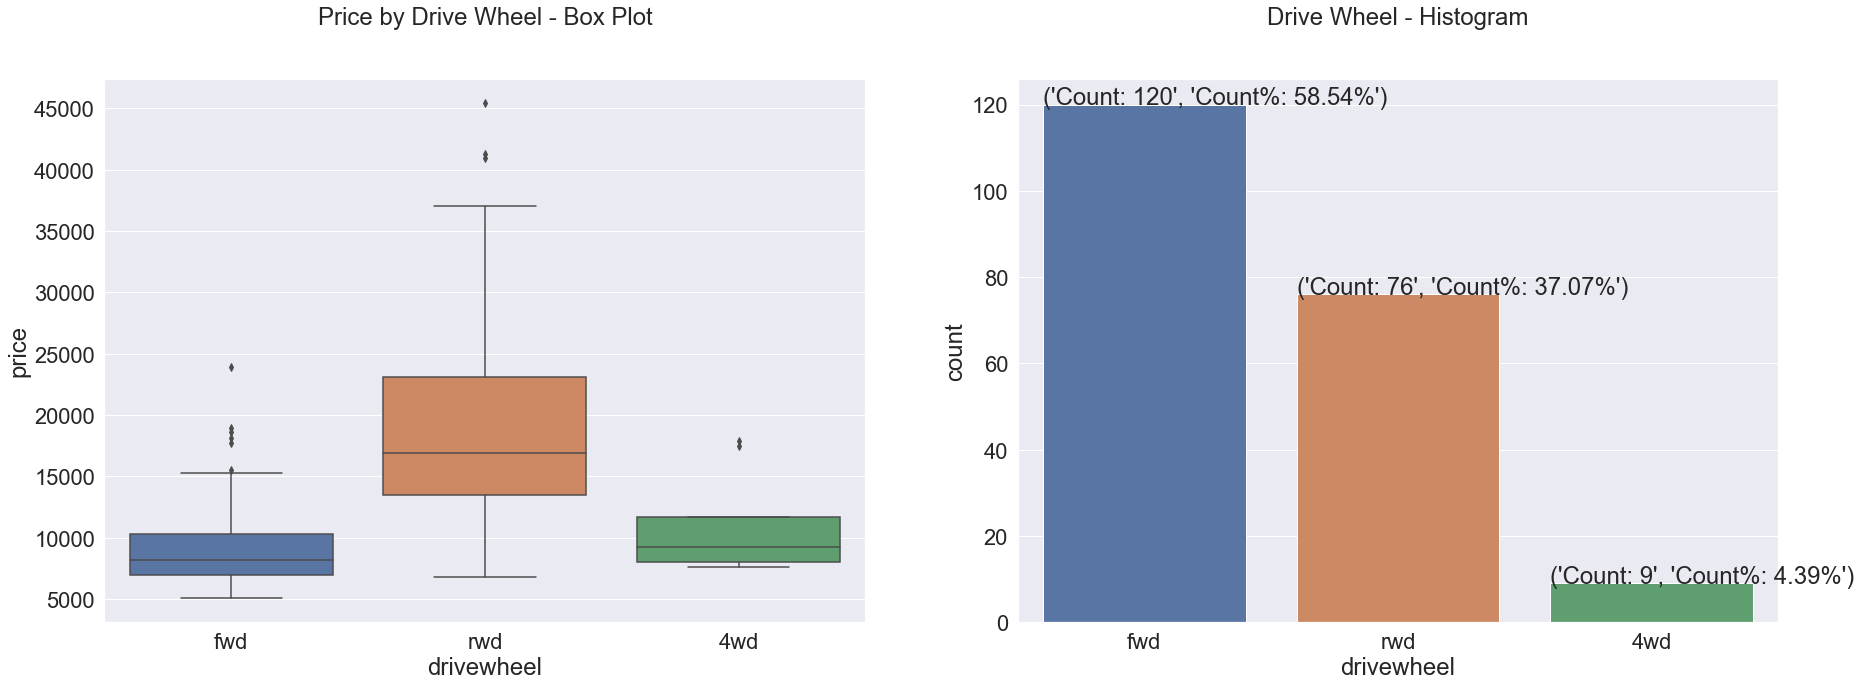

In [15]:
# visualise data
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=2)

plt.subplot(1, 2, 1)
g = sns.boxplot(y="price", x="drivewheel",data=data, order=data["drivewheel"].value_counts().index)
g.text(0.5, 1.1, "Price by Drive Wheel - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 2, 2)
g = sns.countplot(data["drivewheel"], order=data["drivewheel"].value_counts().index)
g.text(0.5, 1.1, "Drive Wheel - Histogram", size=24, ha="center", transform=g.transAxes)
for p, label in zip(g.patches, zip(data["drivewheel"].value_counts().apply(lambda x: 'Count: ' + str(x)), 
            np.round(data["drivewheel"].value_counts()/len(data)*100, 2).apply(lambda x: 'Count%: ' + str(x) + '%'))):
    g.annotate(label, (p.get_x(), p.get_height()+0.15))

plt.show()

# # perform encoding of brand group using get_dummies function (one-hot encoding) when treating multi-level categoricals

### Understand column enginelocation
- < 2% of the data (cars) have enginelocation = rear; if we are to use this column, we need more datapoints for statistical confidence
- Hence drop this column

In [16]:
# review levels of the categorical quickly
data["enginelocation"].value_counts()

# drop enginelocation
data.drop("enginelocation", inplace = True, axis = 1)

### Understand column enginetype
- There is only one dohcv type car; dohcv pricing is similar to ohcv rather than other types; so group them
- Also, there are only 4 rotor type cars; l pricing is similar to rotor rather than other types; so group them
- ohcv/dohcv have highest prices; followed by dohc, l/rotor, ohcf and then ohc

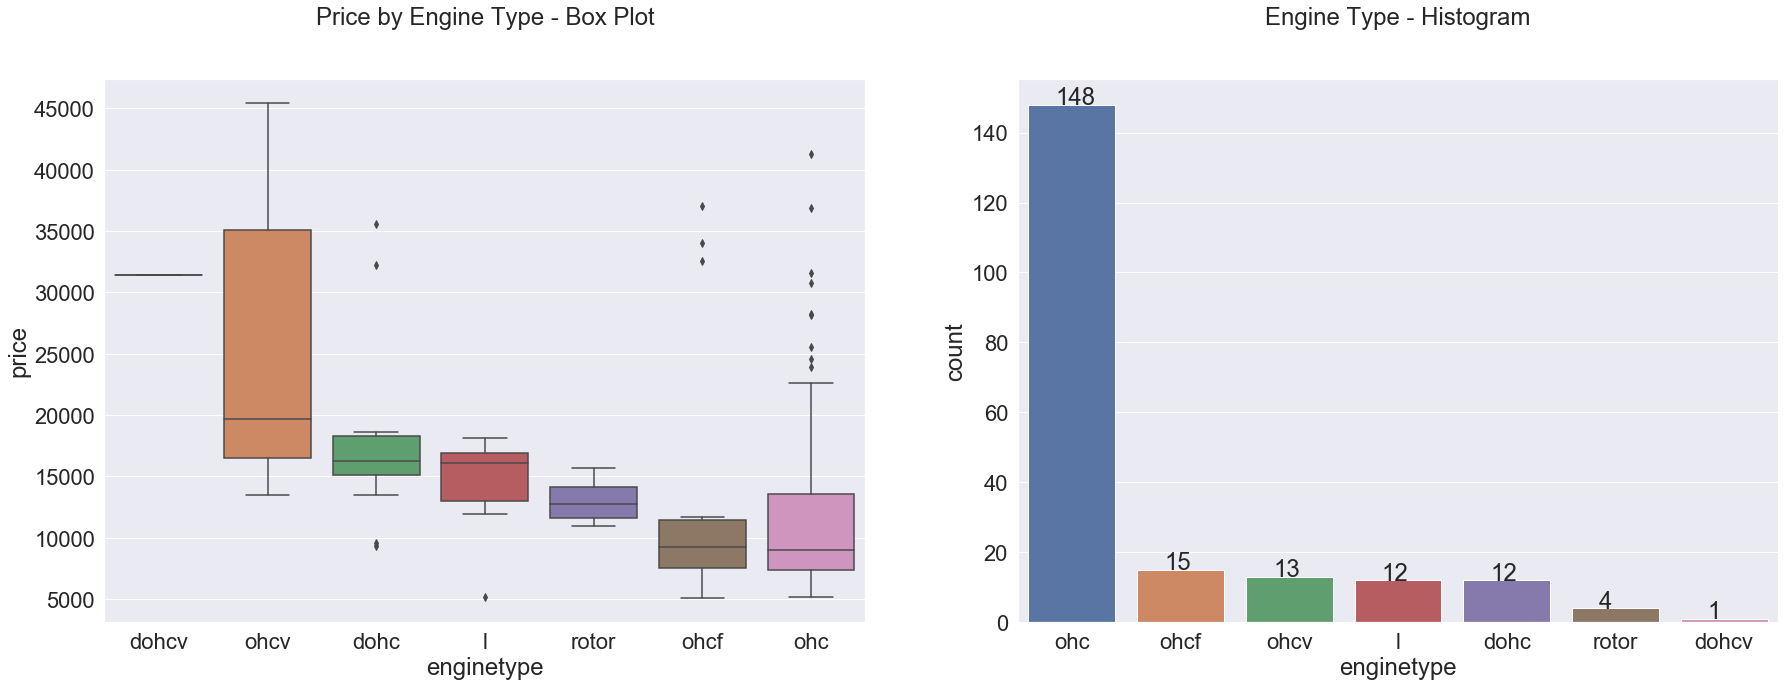

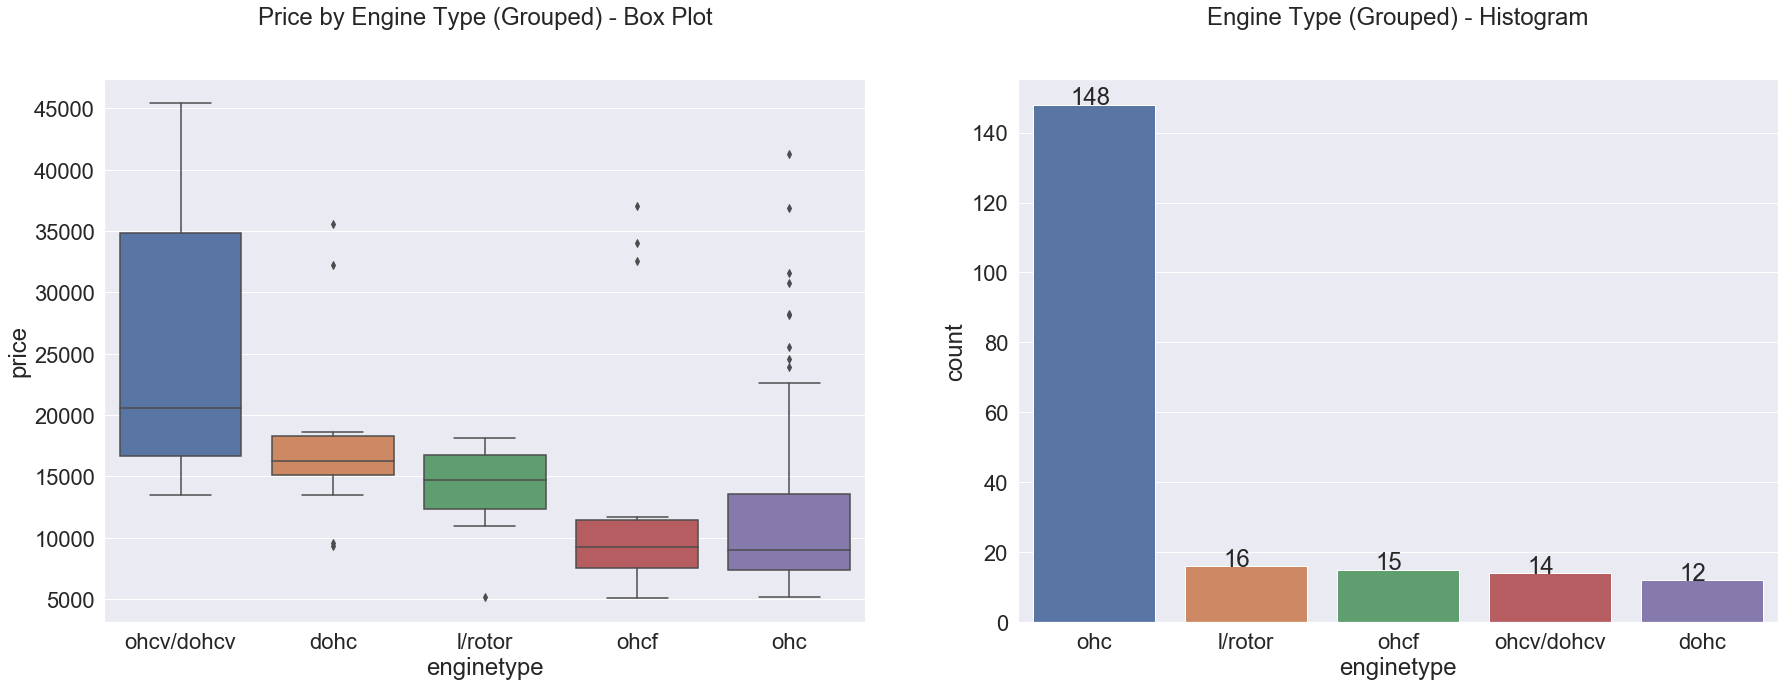

In [17]:
# visualise data
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=2)

plt.subplot(1, 2, 1)
g = sns.boxplot(y="price", x="enginetype",data=data,
                order=data.groupby("enginetype").price.median().sort_values(ascending=False).index)
g.text(0.5, 1.1, "Price by Engine Type - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 2, 2)
g = sns.countplot(data["enginetype"], order=data["enginetype"].value_counts().index)
g.text(0.5, 1.1, "Engine Type - Histogram", size=24, ha="center", transform=g.transAxes)
for p, label in zip(g.patches, data["enginetype"].value_counts()):
    g.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))

plt.show()

# group ohcv/dohcv
data["enginetype"] = data["enginetype"].apply(lambda x:"ohcv/dohcv" if x=='ohcv' or x=='dohcv' else x)

# group rotor/l
data["enginetype"] = data["enginetype"].apply(lambda x:"l/rotor" if x=='l' or x=='rotor' else x)

# visualise data with grouped enginetypes
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=2)

plt.subplot(1, 2, 1)
g = sns.boxplot(y="price", x="enginetype",data=data,
                order=data.groupby("enginetype").price.median().sort_values(ascending=False).index)
g.text(0.5, 1.1, "Price by Engine Type (Grouped) - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 2, 2)
g = sns.countplot(data["enginetype"], order=data["enginetype"].value_counts().index)
g.text(0.5, 1.1, "Engine Type (Grouped) - Histogram", size=24, ha="center", transform=g.transAxes)
for p, label in zip(g.patches, data["enginetype"].value_counts()):
    g.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))

plt.show()

# perform encoding of engine type (grouped) using get_dummies function (one-hot encoding) when treating multi-level categoricals

### Understand column cylindernumber
- Too few cars have 8, 2, 12 or 3 cylinders
- Based on the price distribution by number of cylinders, makes sense to group cars by '<= 4' cylinders and '>4' cylinders and also encode them as 0-1s
- Pricing is apparently higher for cars with >4 cylinders vs. cars with <=4 cylinders

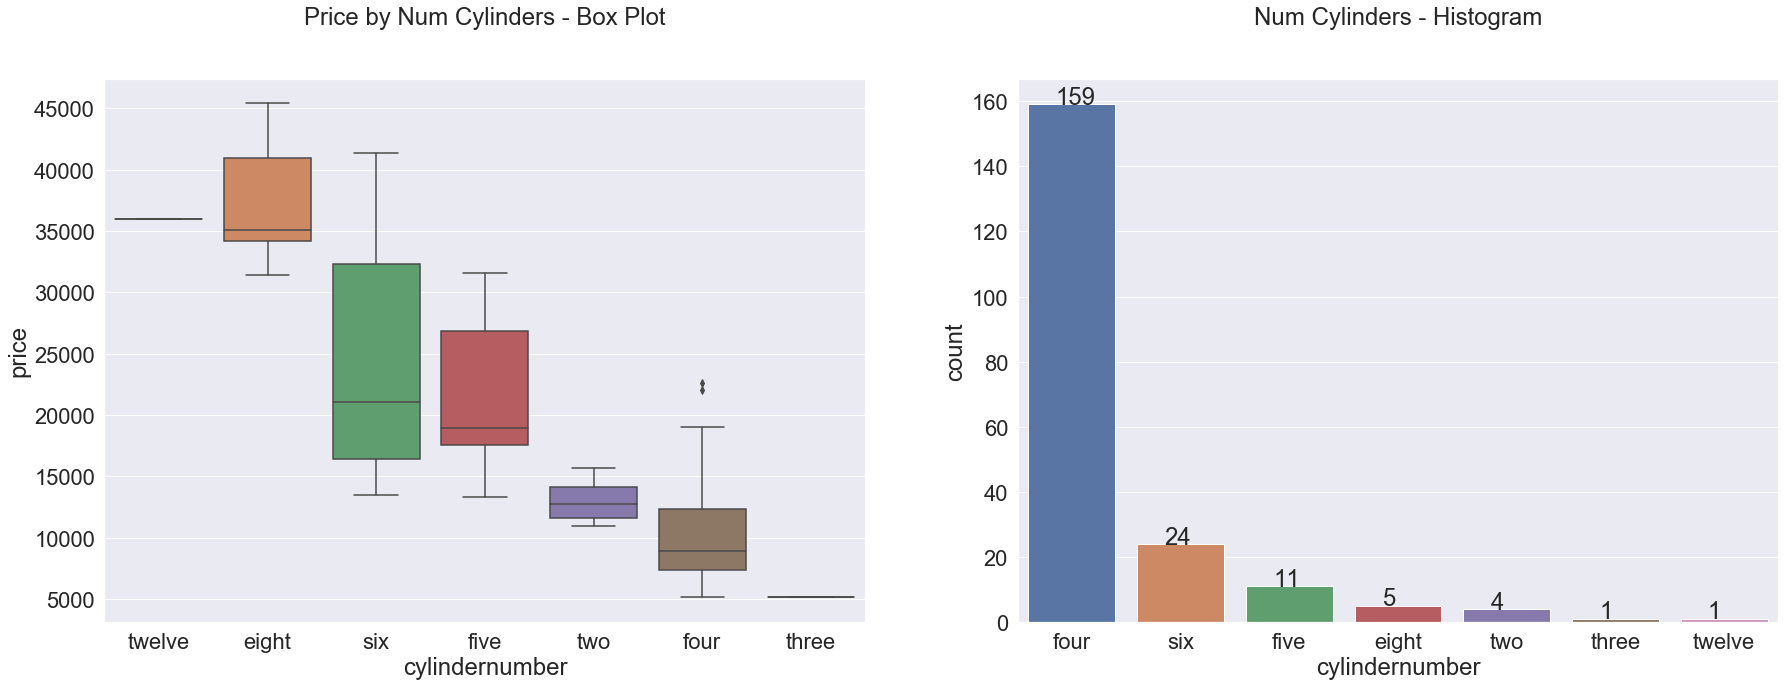

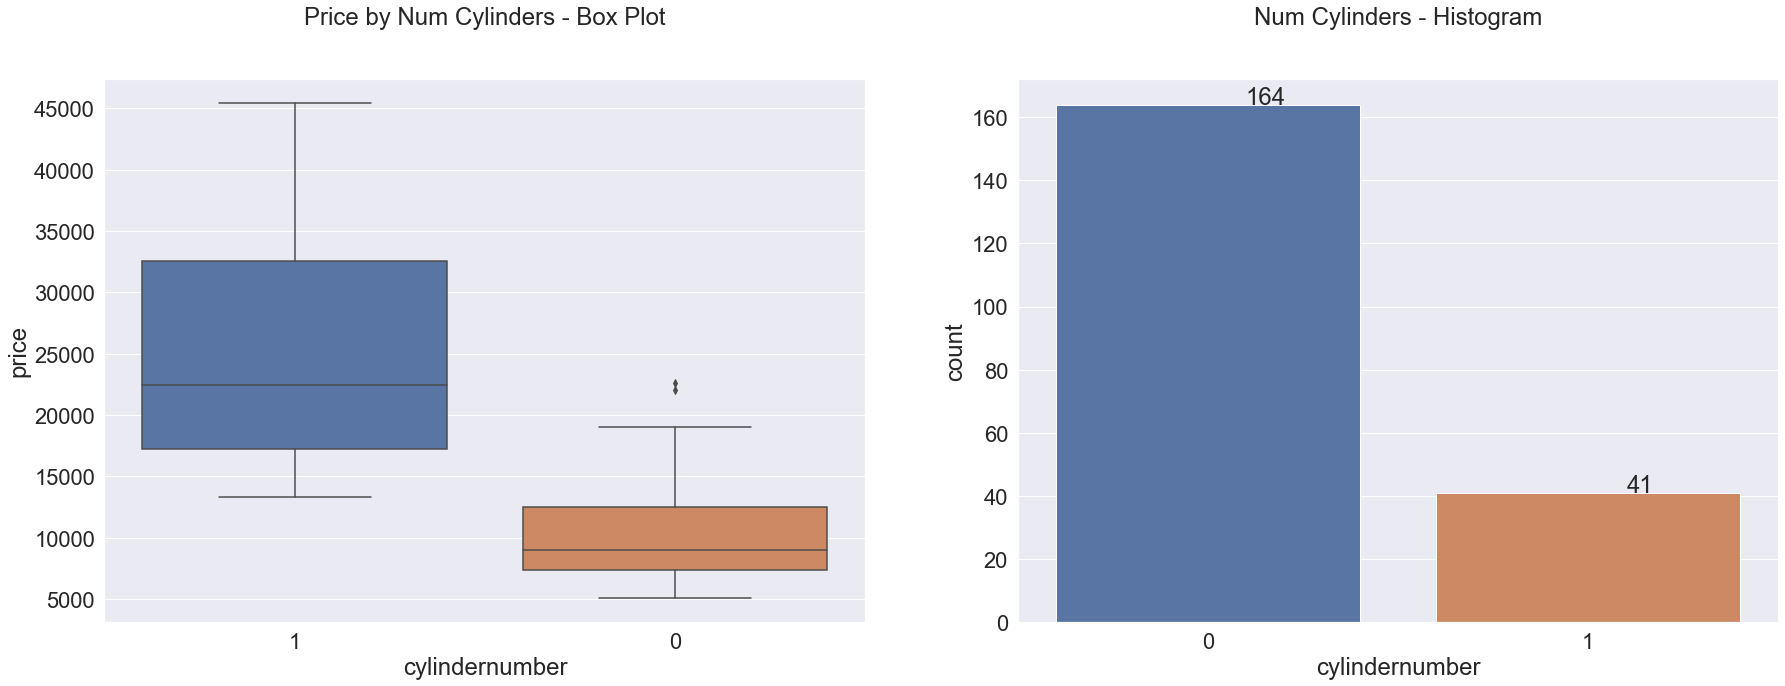

In [18]:
# visualise data
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=2)

plt.subplot(1, 2, 1)
g = sns.boxplot(y="price", x="cylindernumber",data=data,
                order=data.groupby("cylindernumber").price.median().sort_values(ascending=False).index)
g.text(0.5, 1.1, "Price by Num Cylinders - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 2, 2)
g = sns.countplot(data["cylindernumber"], order=data["cylindernumber"].value_counts().index)
g.text(0.5, 1.1, "Num Cylinders - Histogram", size=24, ha="center", transform=g.transAxes)
for p, label in zip(g.patches, data["cylindernumber"].value_counts()):
    g.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))

plt.show()

# group cylindernumber by '<= 4' cylinders and '>4' cylinders, and encode them as 0-1
data["cylindernumber"] = data["cylindernumber"].apply(lambda x: 0 if x in ['two','three','four'] else 1)

# visualise data again - after grouping
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=2)

plt.subplot(1, 2, 1)
g = sns.boxplot(y="price", x="cylindernumber",data=data,
                order=data.groupby("cylindernumber").price.median().sort_values(ascending=False).index)
g.text(0.5, 1.1, "Price by Num Cylinders - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 2, 2)
g = sns.countplot(data["cylindernumber"], order=data["cylindernumber"].value_counts().index)
g.text(0.5, 1.1, "Num Cylinders - Histogram", size=24, ha="center", transform=g.transAxes)
for p, label in zip(g.patches, data["cylindernumber"].value_counts()):
    g.annotate(label, (p.get_x()+0.5, p.get_height()+0.15))

plt.show()

### Understand column fuelsystem
- Too few cars have 'spdi', '4bbl', 'spfi' or 'mfi' fuel systems
- Based on the price distribution by number of cylinders, makes sense to group 'mfi' and '4bbl' with 'idi', and 'spfi' with 'spdi'
- More often than not, mfpi cars priced higher than idi/mfi/4bbl, spfi/spdi, sbbl, 1bbl

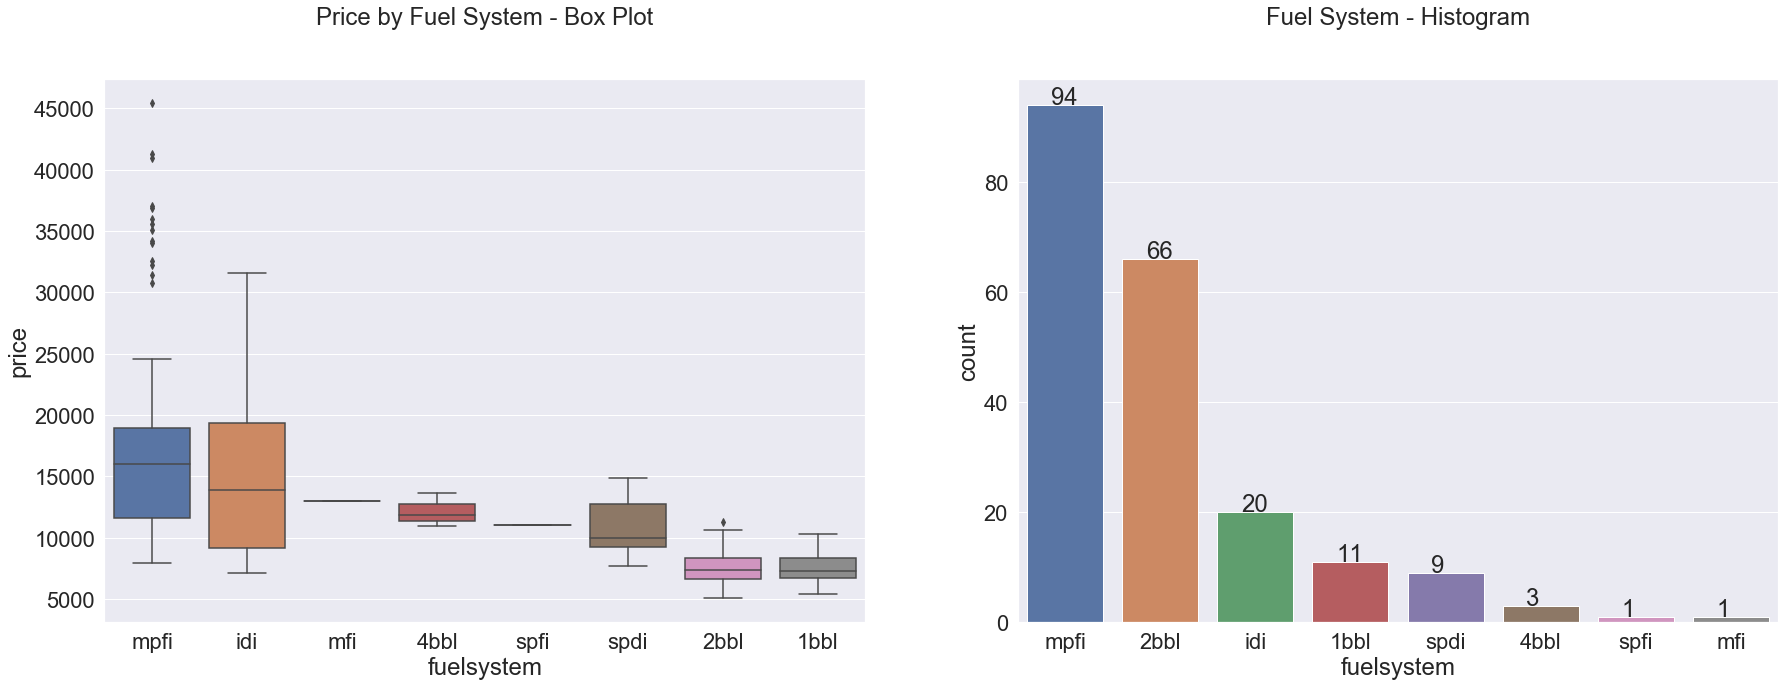

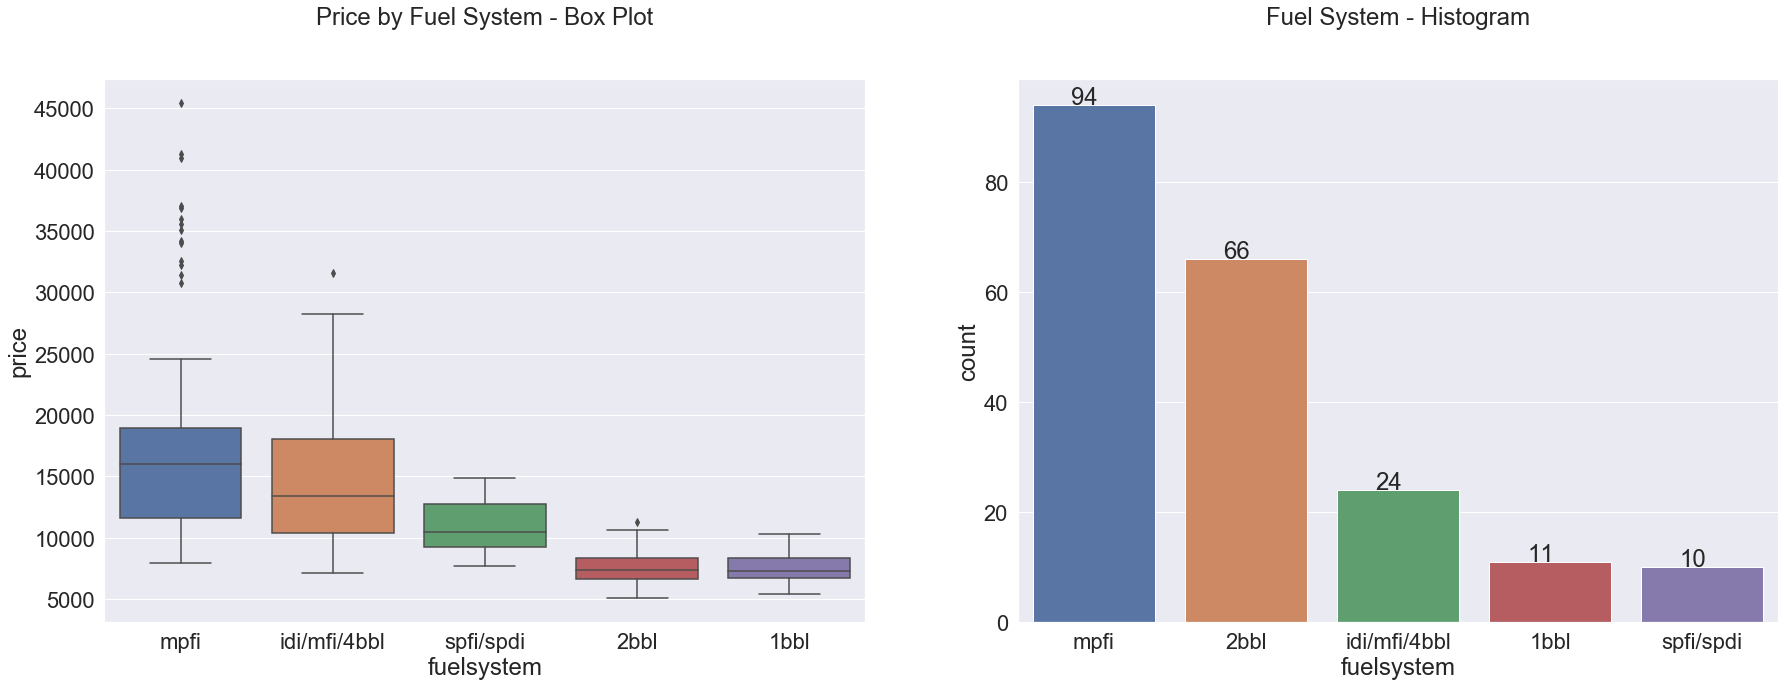

In [19]:
# visualise data
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=2)

plt.subplot(1, 2, 1)
g = sns.boxplot(y="price", x="fuelsystem",data=data,
                order=data.groupby("fuelsystem").price.median().sort_values(ascending=False).index)
g.text(0.5, 1.1, "Price by Fuel System - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 2, 2)
g = sns.countplot(data["fuelsystem"], order=data["fuelsystem"].value_counts().index)
g.text(0.5, 1.1, "Fuel System - Histogram", size=24, ha="center", transform=g.transAxes)
for p, label in zip(g.patches, data["fuelsystem"].value_counts()):
    g.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))

plt.show()

# group 'mfi' and '4bbl' with 'idi', and 'spfi' with 'spdi'
data["fuelsystem"] = data["fuelsystem"].apply(lambda x: 'idi/mfi/4bbl' if x in ['mfi', '4bbl', 'idi'] else x)
data["fuelsystem"] = data["fuelsystem"].apply(lambda x: 'spfi/spdi' if x in ['spfi', 'spdi'] else x)

# visualise data again post grouping
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=2)

plt.subplot(1, 2, 1)
g = sns.boxplot(y="price", x="fuelsystem",data=data,
                order=data.groupby("fuelsystem").price.median().sort_values(ascending=False).index)
g.text(0.5, 1.1, "Price by Fuel System - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 2, 2)
g = sns.countplot(data["fuelsystem"], order=data["fuelsystem"].value_counts().index)
g.text(0.5, 1.1, "Fuel System - Histogram", size=24, ha="center", transform=g.transAxes)
for p, label in zip(g.patches, data["fuelsystem"].value_counts()):
    g.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))

plt.show()

### Understand Car Dimension (wheelbase, carlength, carwidth, carheight, curbweight)
- Curbweight, car width and car length well-correlated with price
- Car height not well-correlated with price
- But car dimensions in general quite inter-correlated, hence VIP analysis may be needed
- Outlier capping needed for Wheel Base, Car Length and Car Width

/Users/stray/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


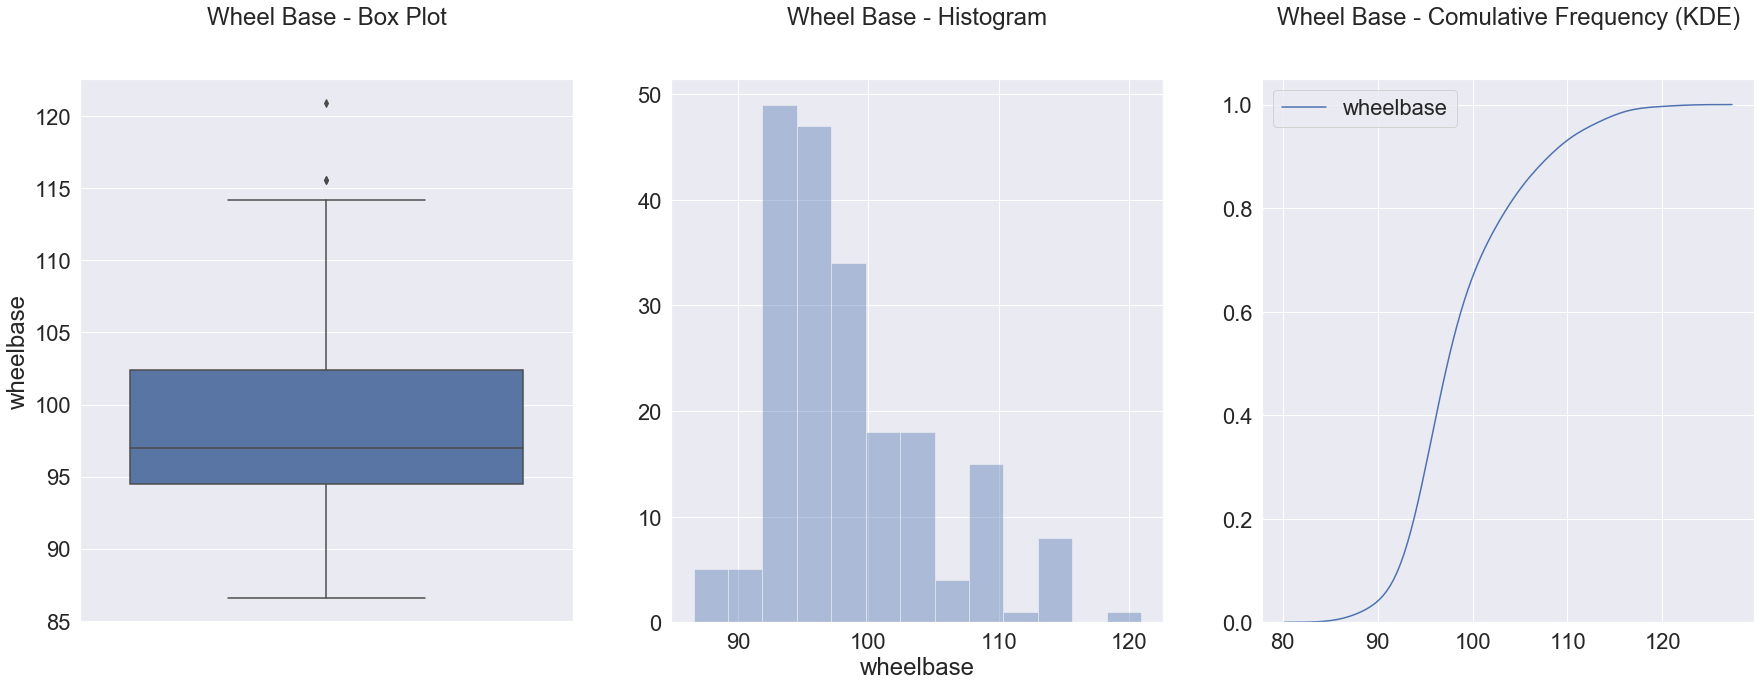

25th Percentile Wheelbase value is: 94.5
75th Percentile Wheelbase value is: 102.4
90th Percentile Wheelbase value is: 107.9
95th Percentile Wheelbase value is: 110.0
Min Value (Box Plot) of Wheelbase is : 82.64999999999999
Max Value (Box Plot) of Wheelbase is : 114.25000000000001
Number of Lower Range Wheelbase Outliers: 0 (0.0%)
Number of Upper Range Wheelbase Outliers: 3 (1.46%)


/Users/stray/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/stray/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


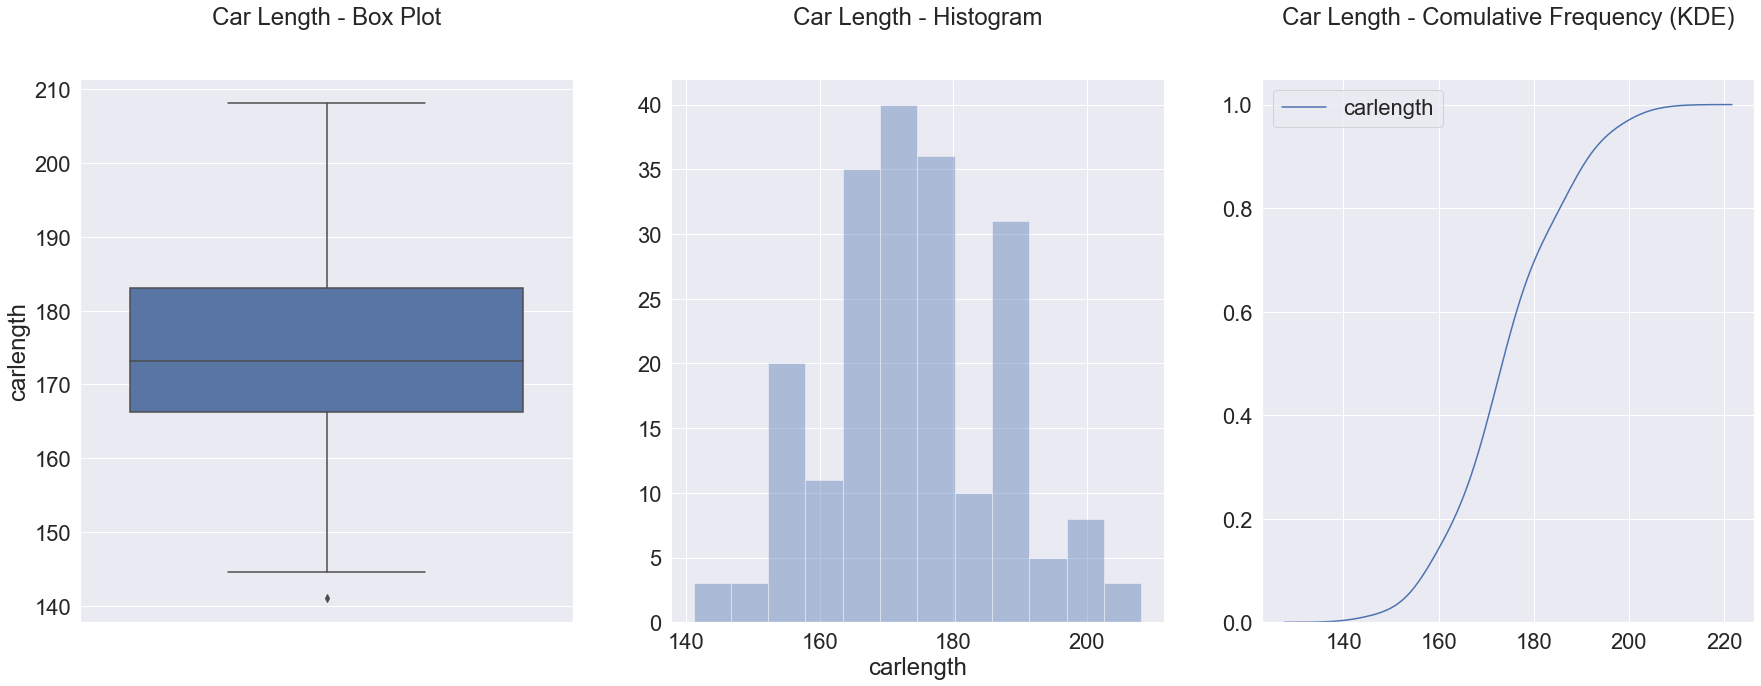

25th Percentile Car Length value is: 166.3
75th Percentile Car Length value is: 183.1
5th Percentile Car Length value is: 157.14
10th Percentile Car Length value is: 157.3
Min Value (Box Plot) of Car Length is : 141.10000000000002
Max Value (Box Plot) of Car Length is : 208.29999999999995
Number of Lower Range Car Length Outliers: 1 (0.49%)
Number of Upper Range Car Length Outliers: 0 (0.0%)


/Users/stray/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/stray/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


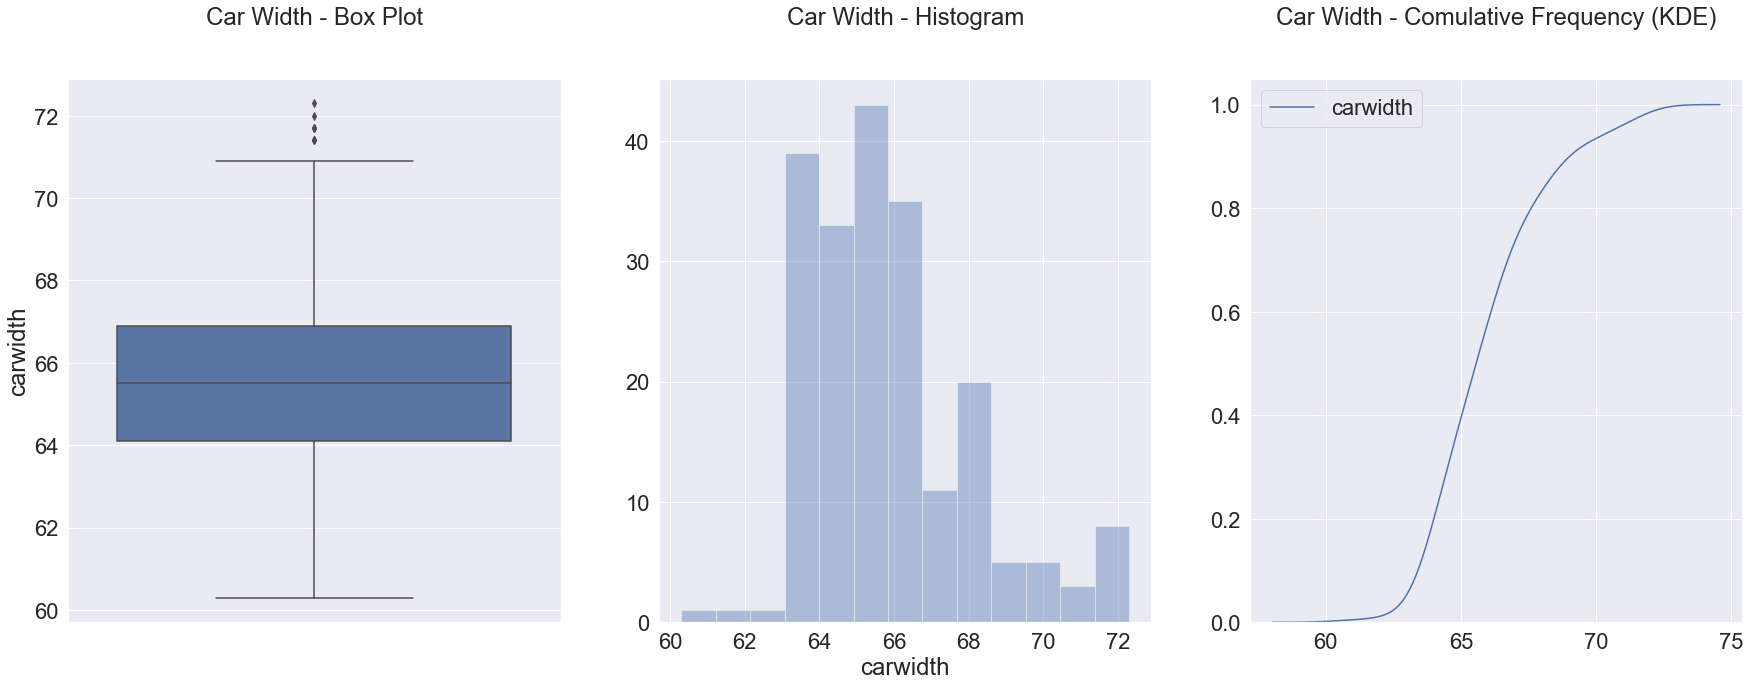

25th Percentile Car Width value is: 64.1
75th Percentile Car Width value is: 66.9
95th Percentile Car Width value is: 70.46
90th Percentile Car Width value is: 68.64
Min Value (Box Plot) of Car Width is : 59.89999999999998
Max Value (Box Plot) of Car Width is : 71.10000000000002
Number of Lower Range Car Width Outliers: 0 (0.0%)
Number of Upper Range Car Width Outliers: 8 (3.9%)


/Users/stray/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/stray/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


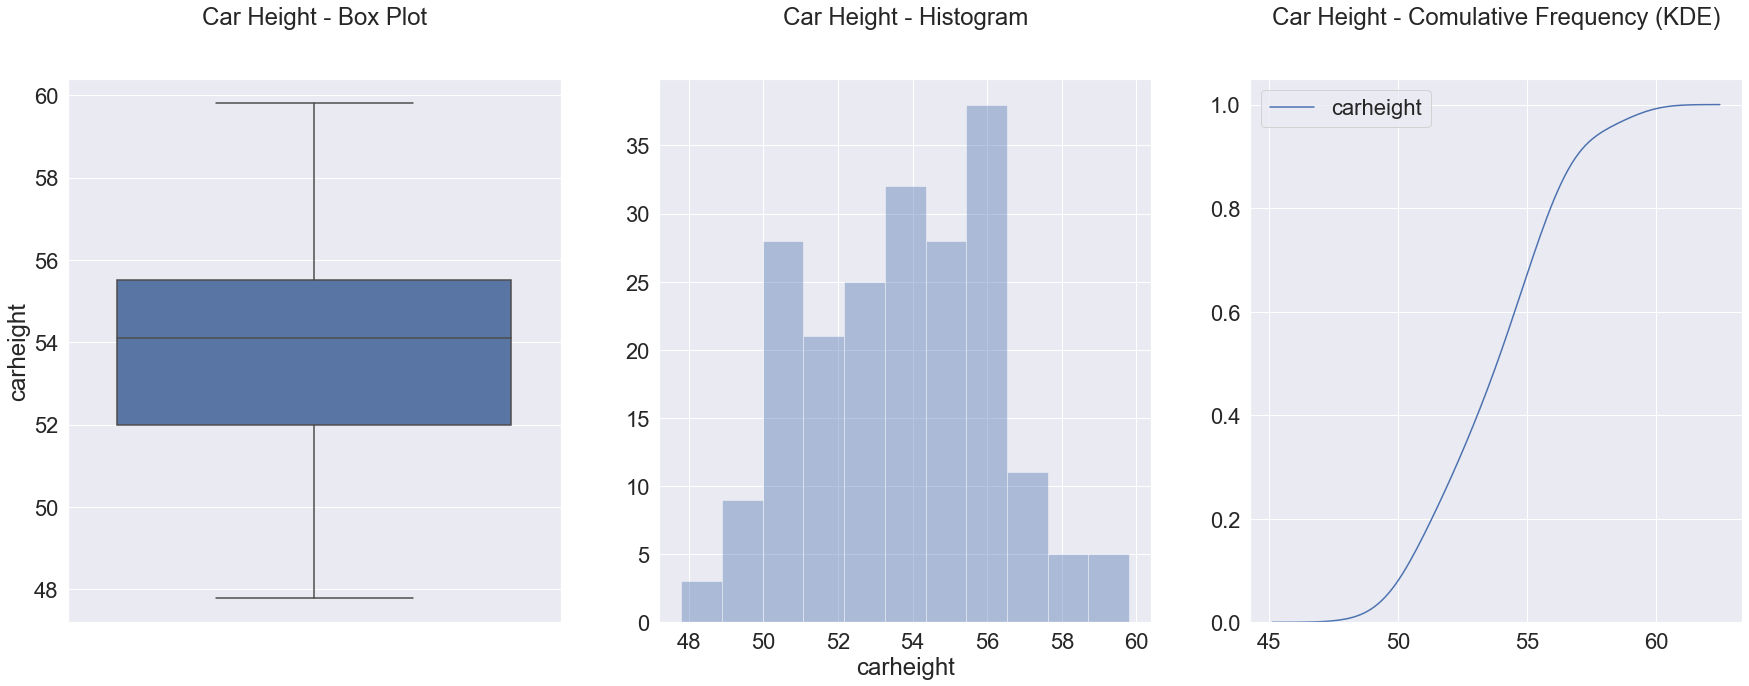

/Users/stray/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


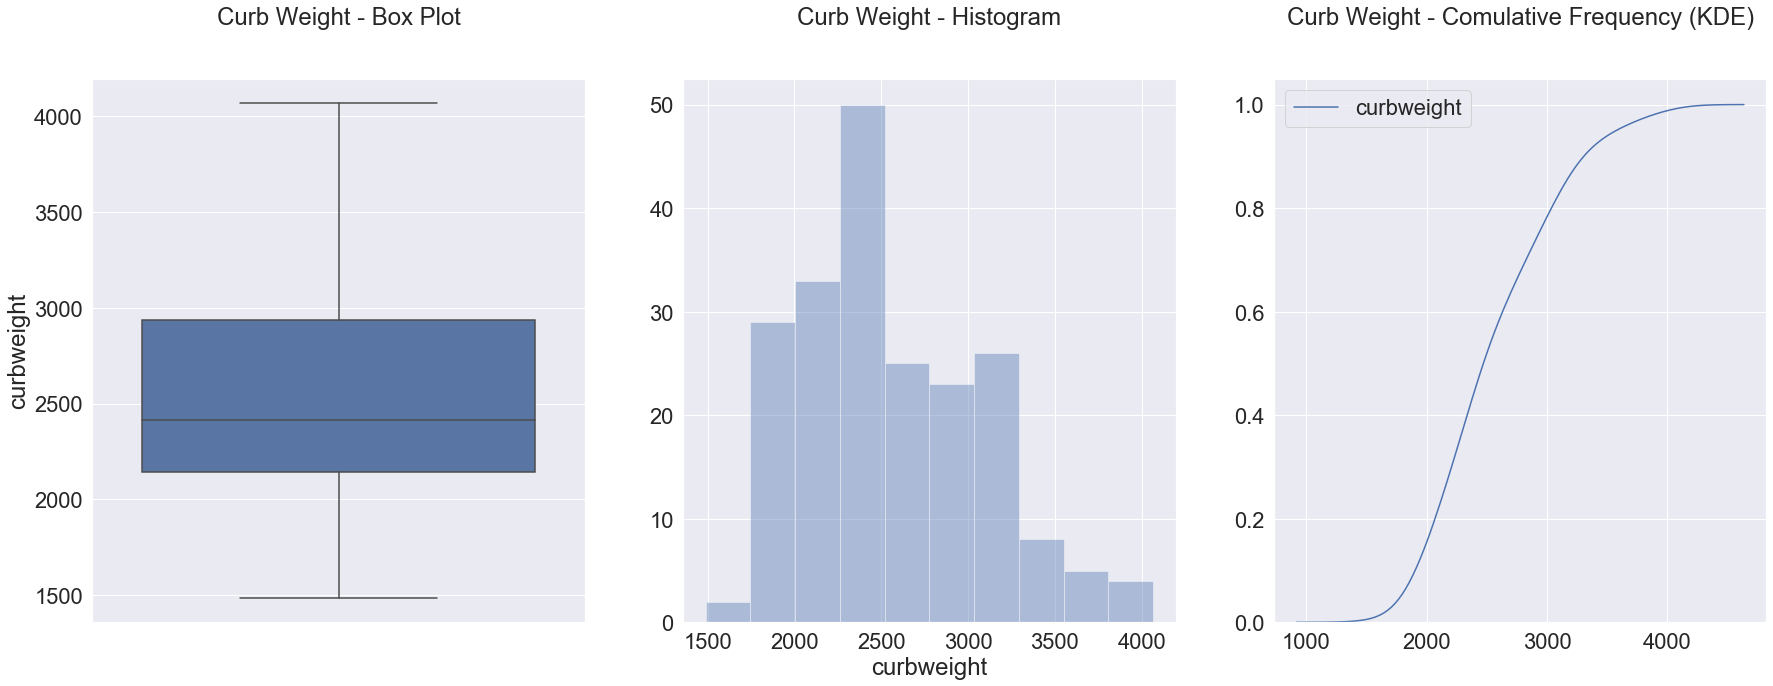

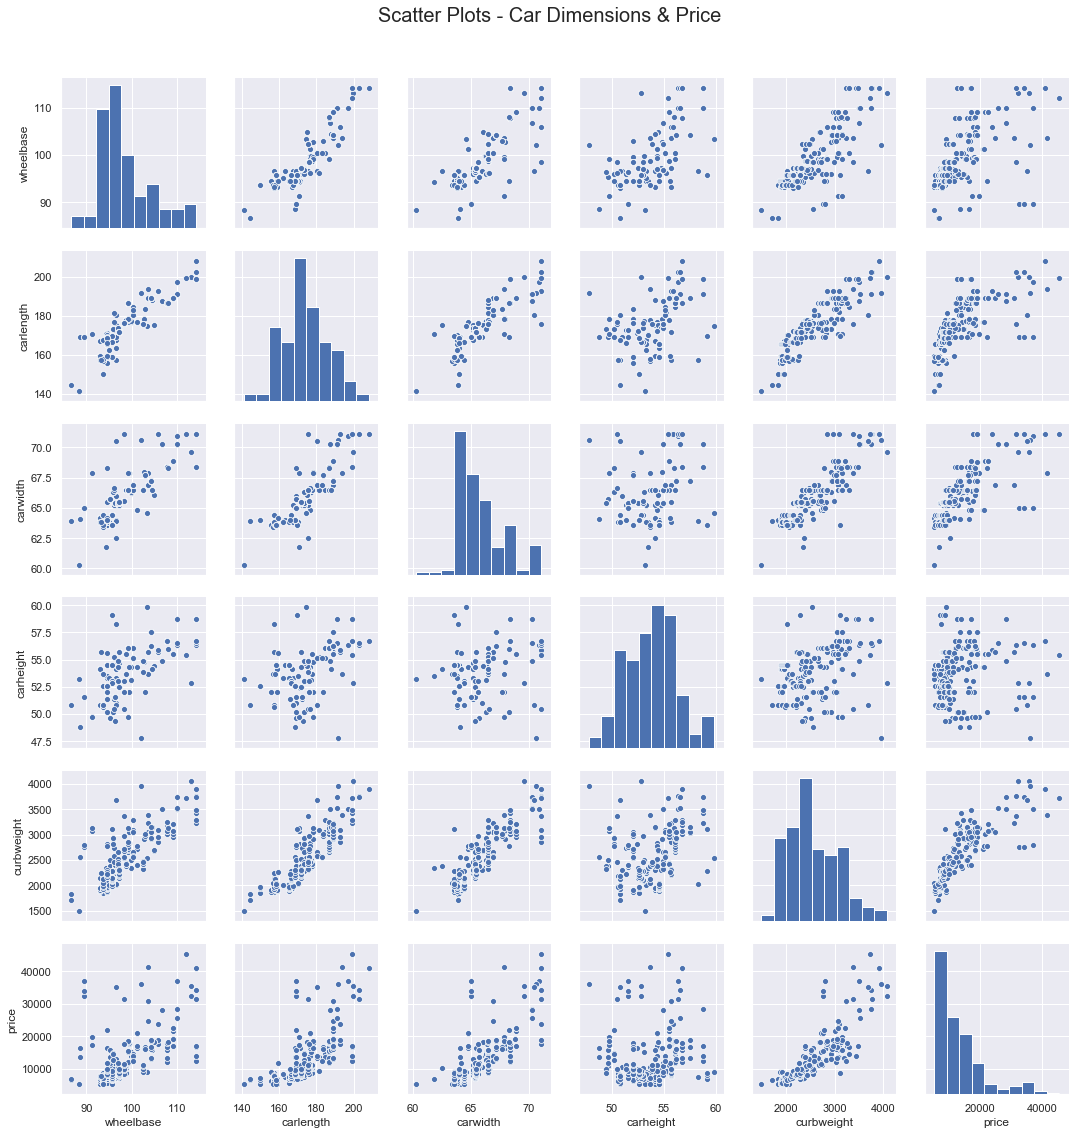

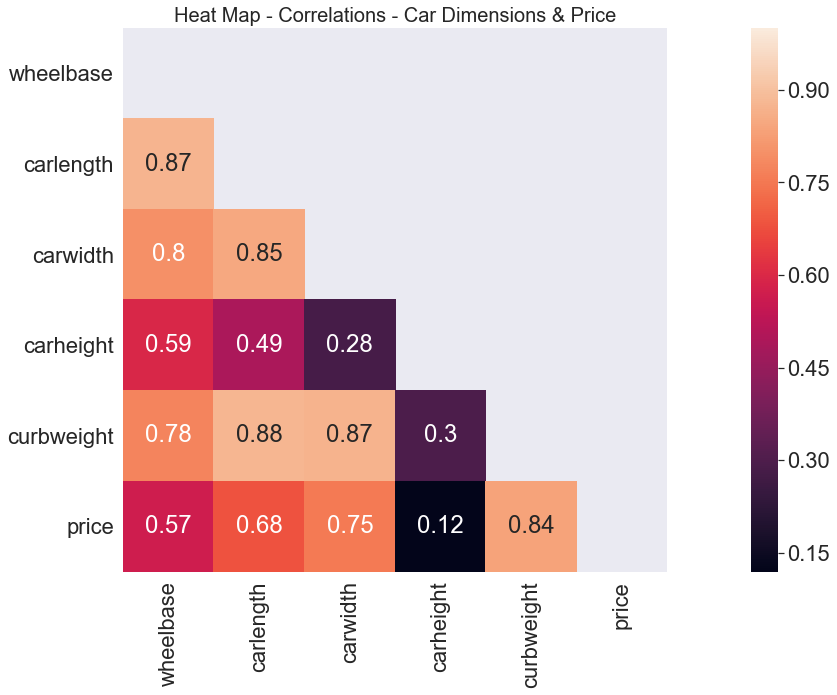

In [20]:
# univariate analysis / visualisation
sns.set(font_scale=2)

plt.subplot(1, 3, 1)
g = sns.boxplot(data["wheelbase"], orient='v')
g.text(0.5, 1.1, "Wheel Base - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 2)
g = sns.distplot(data["wheelbase"], kde=False)
g.text(0.5, 1.1, "Wheel Base - Histogram", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 3)
g = sns.kdeplot(data["wheelbase"], cumulative=True)
g.text(0.5, 1.1, "Wheel Base - Comulative Frequency (KDE)", size=24, ha="center", transform=g.transAxes)

plt.show()

p_25 = np.percentile(data["wheelbase"], 25)
p_75 = np.percentile(data["wheelbase"], 75)
IQR = p_75 - p_25
min_box = p_25 - 1.5*IQR
max_box = p_75 + 1.5*IQR
print('25th Percentile Wheelbase value is: ' + str(p_25))
print('75th Percentile Wheelbase value is: ' + str(p_75))
print('90th Percentile Wheelbase value is: ' + str(np.percentile(data["wheelbase"], 90)))
print('95th Percentile Wheelbase value is: ' + str(np.percentile(data["wheelbase"], 95)))
print('Min Value (Box Plot) of Wheelbase is : ' + str(min_box))
print('Max Value (Box Plot) of Wheelbase is : ' + str(max_box))
print('Number of Lower Range Wheelbase Outliers: ' + str(len(data[data["wheelbase"] < min_box]))
      + ' (' + str(np.round(len(data[data["wheelbase"] < min_box])/len(data)*100,2)) +'%)')
print('Number of Upper Range Wheelbase Outliers: ' + str(len(data[data["wheelbase"] > max_box]))
      + ' (' + str(np.round(len(data[data["wheelbase"] > max_box])/len(data)*100,2)) +'%)')

data["wheelbase"][data["wheelbase"] > max_box] = max_box # treat outliers

sns.set(font_scale=2)

plt.subplot(1, 3, 1)
g = sns.boxplot(data["carlength"], orient='v')
g.text(0.5, 1.1, "Car Length - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 2)
g = sns.distplot(data["carlength"], kde=False)
g.text(0.5, 1.1, "Car Length - Histogram", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 3)
g = sns.kdeplot(data["carlength"], cumulative=True)
g.text(0.5, 1.1, "Car Length - Comulative Frequency (KDE)", size=24, ha="center", transform=g.transAxes)

plt.show()

p_25 = np.percentile(data["carlength"], 25)
p_75 = np.percentile(data["carlength"], 75)
IQR = p_75 - p_25
min_box = p_25 - 1.5*IQR
max_box = p_75 + 1.5*IQR
print('25th Percentile Car Length value is: ' + str(p_25))
print('75th Percentile Car Length value is: ' + str(p_75))
print('5th Percentile Car Length value is: ' + str(np.percentile(data["carlength"], 5)))
print('10th Percentile Car Length value is: ' + str(np.percentile(data["carlength"], 10)))
print('Min Value (Box Plot) of Car Length is : ' + str(min_box))
print('Max Value (Box Plot) of Car Length is : ' + str(max_box))
print('Number of Lower Range Car Length Outliers: ' + str(len(data[data["carlength"] < min_box]))
      + ' (' + str(np.round(len(data[data["carlength"] < min_box])/len(data)*100,2)) +'%)')
print('Number of Upper Range Car Length Outliers: ' + str(len(data[data["carlength"] > max_box]))
      + ' (' + str(np.round(len(data[data["carlength"] > max_box])/len(data)*100,2)) +'%)')

data["carlength"][data["carlength"] < min_box] = min_box # treat outliers

sns.set(font_scale=2)

plt.subplot(1, 3, 1)
g = sns.boxplot(data["carwidth"], orient='v')
g.text(0.5, 1.1, "Car Width - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 2)
g = sns.distplot(data["carwidth"], kde=False)
g.text(0.5, 1.1, "Car Width - Histogram", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 3)
g = sns.kdeplot(data["carwidth"], cumulative=True)
g.text(0.5, 1.1, "Car Width - Comulative Frequency (KDE)", size=24, ha="center", transform=g.transAxes)

plt.show()

p_25 = np.percentile(data["carwidth"], 25)
p_75 = np.percentile(data["carwidth"], 75)
IQR = p_75 - p_25
min_box = p_25 - 1.5*IQR
max_box = p_75 + 1.5*IQR
print('25th Percentile Car Width value is: ' + str(p_25))
print('75th Percentile Car Width value is: ' + str(p_75))
print('95th Percentile Car Width value is: ' + str(np.percentile(data["carwidth"], 95)))
print('90th Percentile Car Width value is: ' + str(np.percentile(data["carwidth"], 90)))
print('Min Value (Box Plot) of Car Width is : ' + str(min_box))
print('Max Value (Box Plot) of Car Width is : ' + str(max_box))
print('Number of Lower Range Car Width Outliers: ' + str(len(data[data["carwidth"] < min_box]))
      + ' (' + str(np.round(len(data[data["carwidth"] < min_box])/len(data)*100,2)) +'%)')
print('Number of Upper Range Car Width Outliers: ' + str(len(data[data["carwidth"] > max_box]))
      + ' (' + str(np.round(len(data[data["carwidth"] > max_box])/len(data)*100,2)) +'%)')

data["carwidth"][data["carwidth"] > max_box] = max_box # treat outliers

sns.set(font_scale=2)

plt.subplot(1, 3, 1)
g = sns.boxplot(data["carheight"], orient='v')
g.text(0.5, 1.1, "Car Height - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 2)
g = sns.distplot(data["carheight"], kde=False)
g.text(0.5, 1.1, "Car Height - Histogram", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 3)
g = sns.kdeplot(data["carheight"], cumulative=True)
g.text(0.5, 1.1, "Car Height - Comulative Frequency (KDE)", size=24, ha="center", transform=g.transAxes)

plt.show()

sns.set(font_scale=2)

plt.subplot(1, 3, 1)
g = sns.boxplot(data["curbweight"], orient='v')
g.text(0.5, 1.1, "Curb Weight - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 2)
g = sns.distplot(data["curbweight"], kde=False)
g.text(0.5, 1.1, "Curb Weight - Histogram", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 3)
g = sns.kdeplot(data["curbweight"], cumulative=True)
g.text(0.5, 1.1, "Curb Weight - Comulative Frequency (KDE)", size=24, ha="center", transform=g.transAxes)

plt.show()

# visualise
sns.set(font_scale=1)
g = sns.pairplot(data[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'price']])
g.fig.suptitle("Scatter Plots - Car Dimensions & Price", y=1.05, x=0.5, size=20, ha="center")
plt.show()

sns.set(font_scale=2)
corr = data[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'price']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
g = sns.heatmap(corr, mask=mask, square=True, annot=True)
g.set_title("Heat Map - Correlations - Car Dimensions & Price", y=1.05, x=0.5, size=20, ha="center")
plt.show()

### Understand Engine Specs (enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm)
- Variables enginesize, stroke, compressionratio, horsepower, peakrpm required outlier capping
- Variables stroke, compressionratio, and peakrpm have low correlation with price and other engine specs; remove them
- Variables enginesize and horsepower have high correlation with price, and high inter-correlation as well
- Variable boreratio has modest correlation with price, enginesize and horsepower

/Users/stray/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


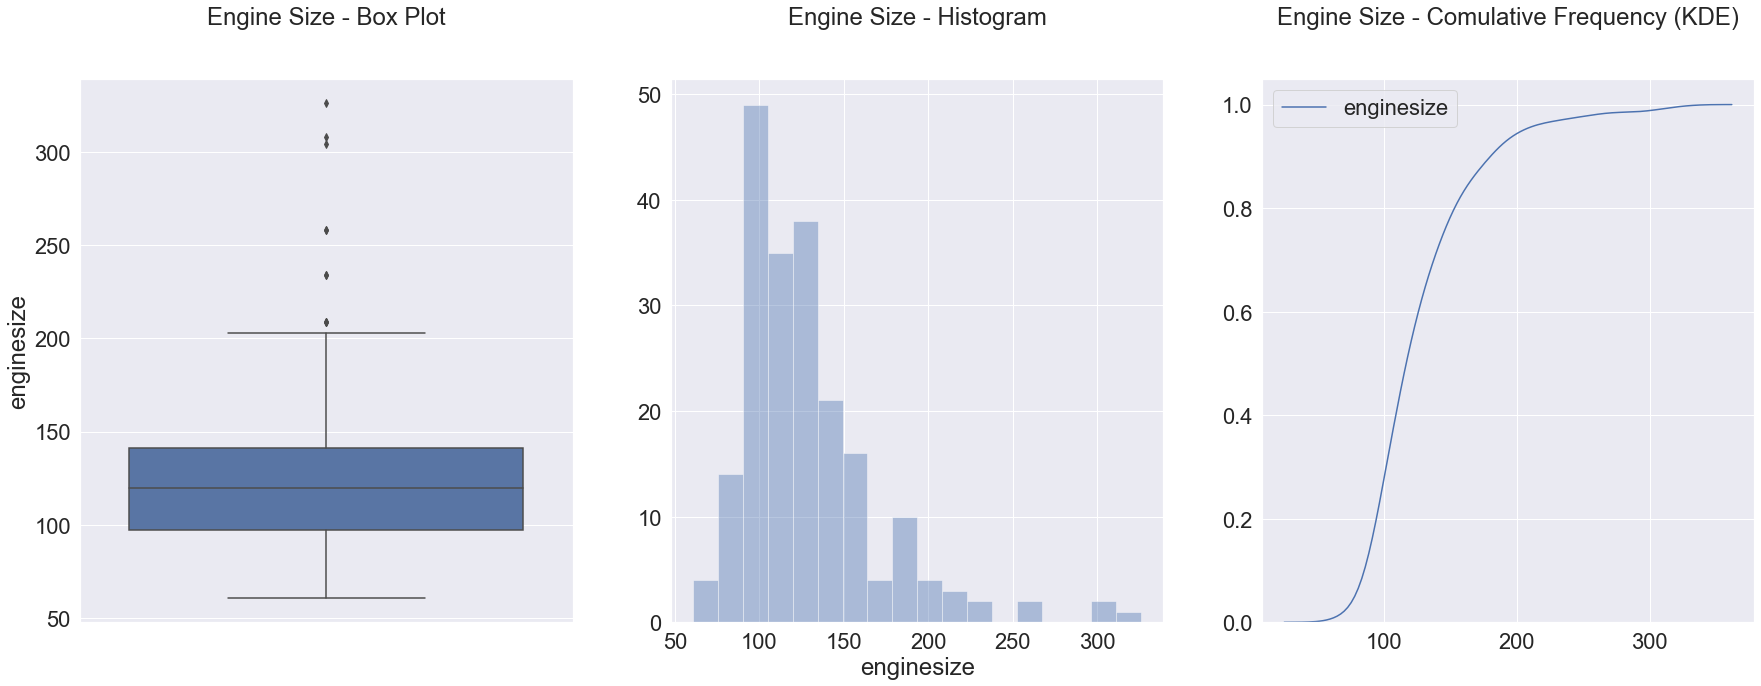

25th Percentile Engine Size value is: 97.0
75th Percentile Engine Size value is: 141.0
90th Percentile Engine Size value is: 181.0
95th Percentile Engine Size value is: 201.19999999999985
Min Value (Box Plot) of Engine Size is : 31.0
Max Value (Box Plot) of Engine Size is : 207.0
Number of Lower Range Engine Size Outliers: 0 (0.0%)
Number of Upper Range Engine Size Outliers: 10 (4.88%)


/Users/stray/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/stray/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


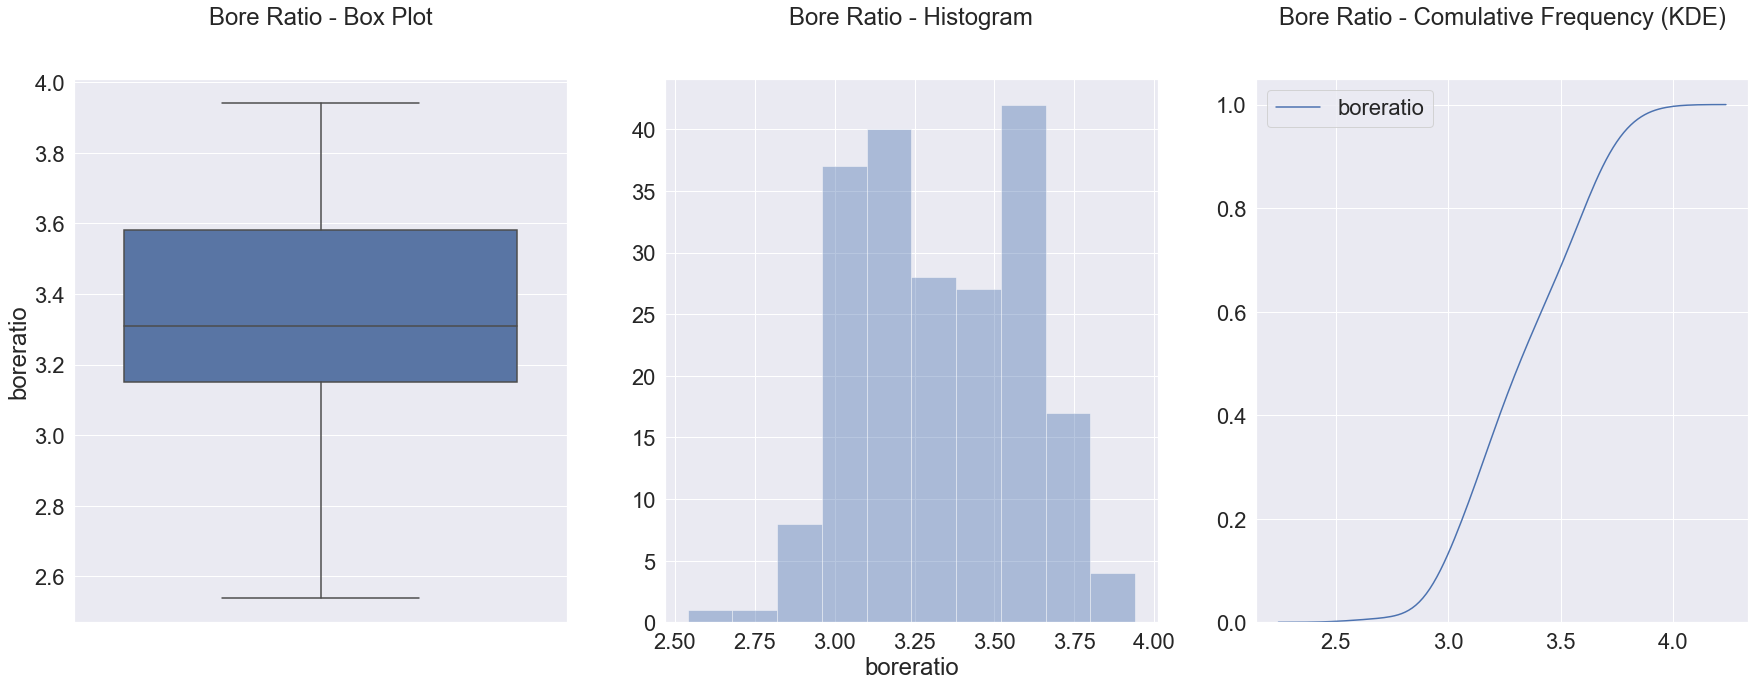

25th Percentile Bore Ratio value is: 3.15
75th Percentile Bore Ratio value is: 3.58
90th Percentile Bore Ratio value is: 3.6719999999999997
95th Percentile Bore Ratio value is: 3.7799999999999994
Min Value (Box Plot) of Bore Ratio is : 2.505
Max Value (Box Plot) of Bore Ratio is : 4.2250000000000005
Number of Lower Range Bore Ratio Outliers: 0 (0.0%)
Number of Upper Range Bore Ratio Outliers: 0 (0.0%)


/Users/stray/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


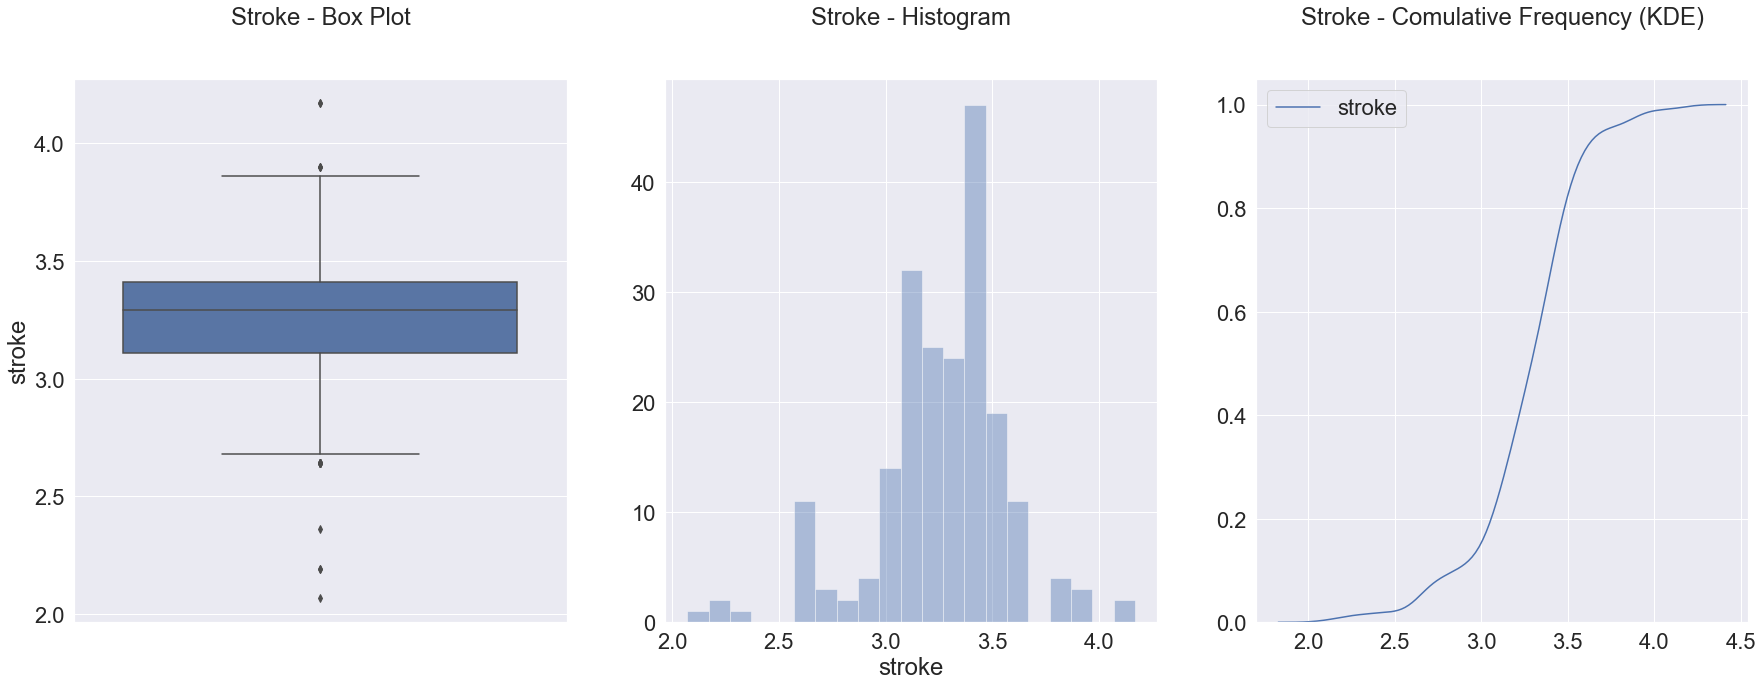

25th Percentile Stroke value is: 3.11
75th Percentile Stroke value is: 3.41
90th Percentile Stroke value is: 3.54
95th Percentile Stroke value is: 3.6400000000000006
Min Value (Box Plot) of Stroke is : 2.6599999999999993
Max Value (Box Plot) of Stroke is : 3.8600000000000003
Number of Lower Range Stroke Outliers: 15 (7.32%)
Number of Upper Range Stroke Outliers: 5 (2.44%)


/Users/stray/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/stray/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/stray/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[i

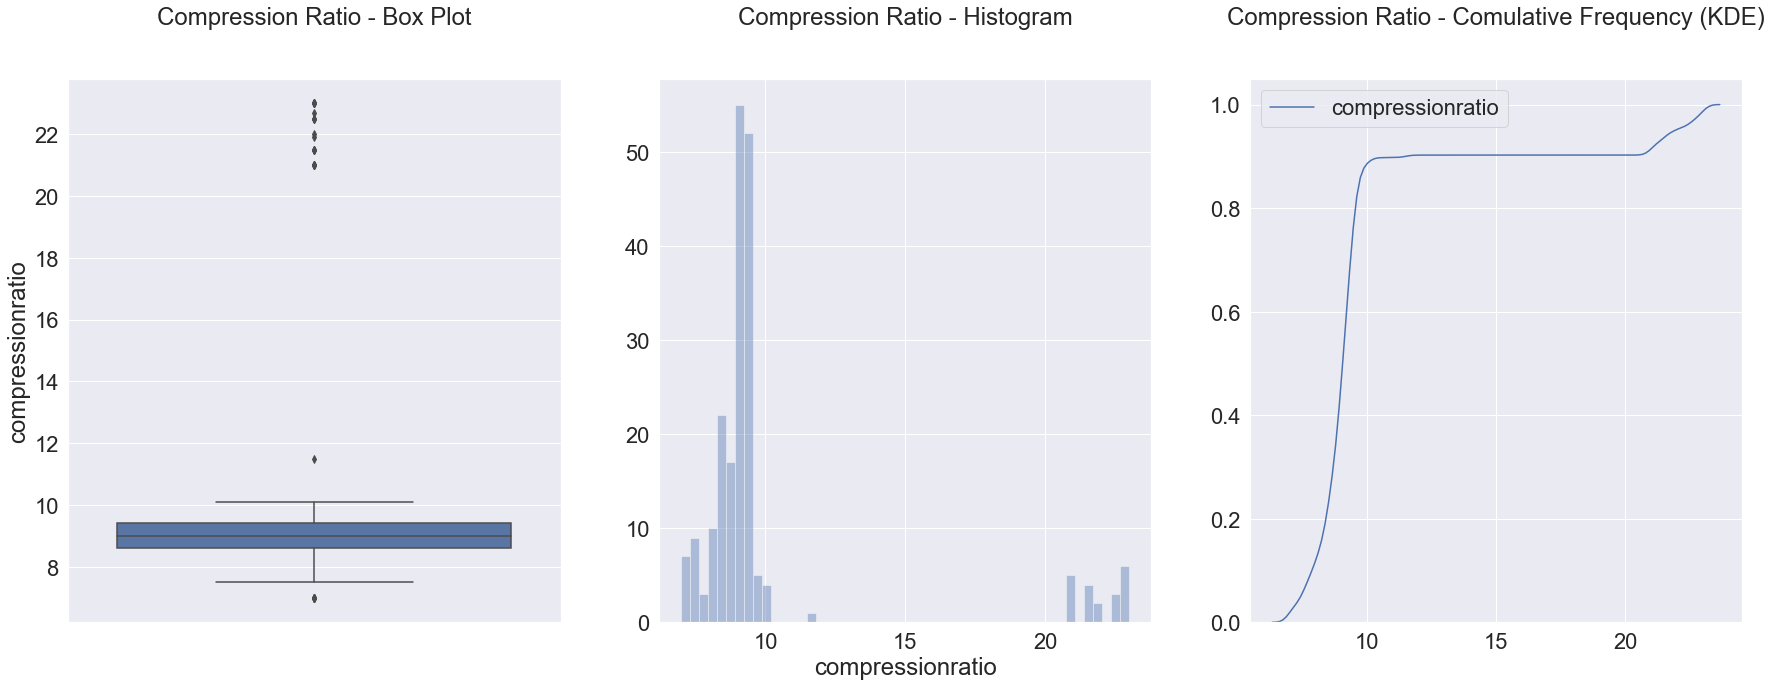

25th Percentile Compression Ratio value is: 8.6
75th Percentile Compression Ratio value is: 9.4
90th Percentile Compression Ratio value is: 10.93999999999999
95th Percentile Compression Ratio value is: 21.819999999999993
Min Value (Box Plot) of Compression Ratio is : 7.399999999999999
Max Value (Box Plot) of Compression Ratio is : 10.600000000000001
Number of Lower Range Compression Ratio Outliers: 7 (3.41%)
Number of Upper Range Compression Ratio Outliers: 21 (10.24%)


/Users/stray/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/stray/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/stray/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[i

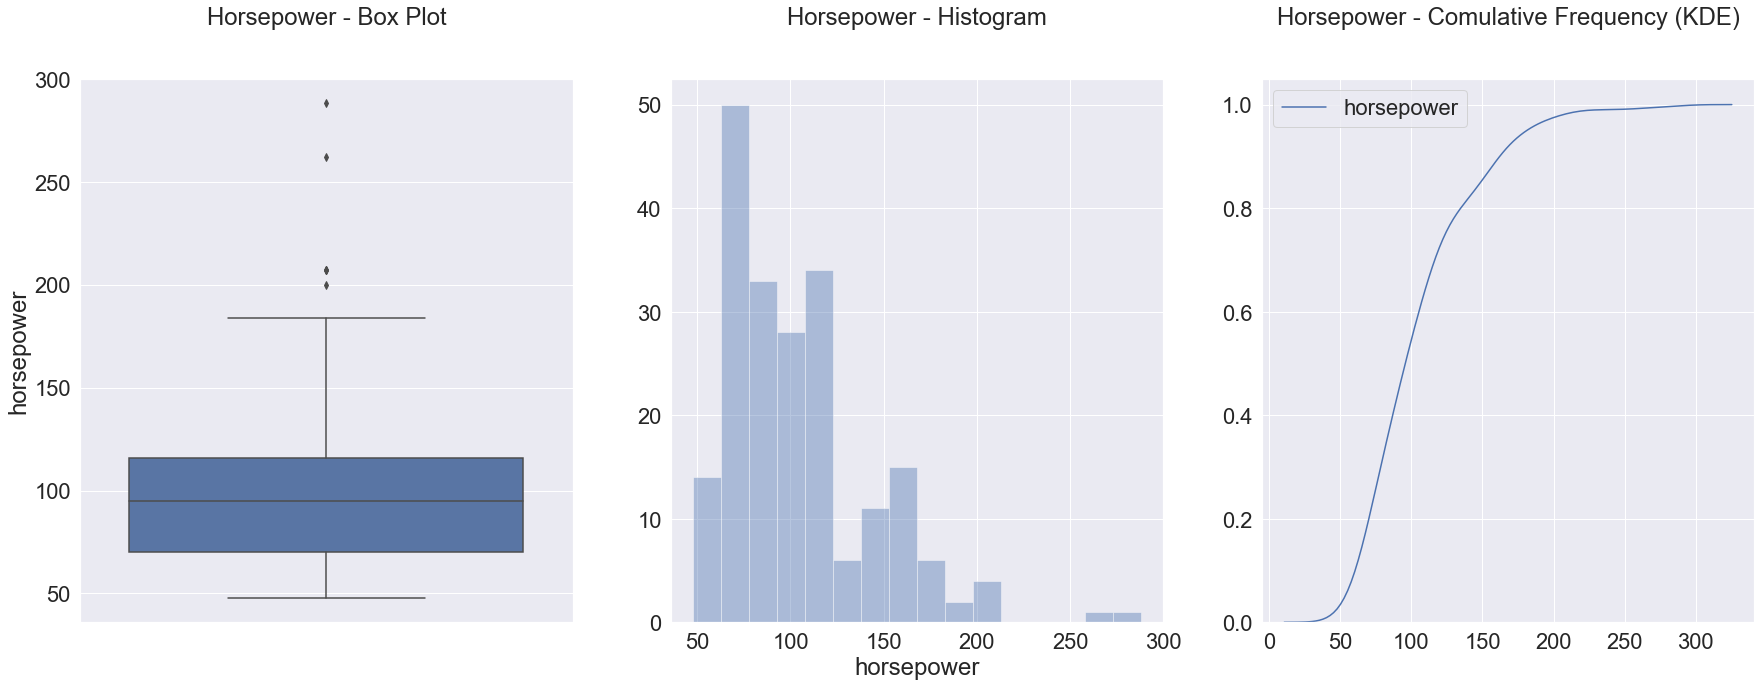

25th Percentile Horsepower value is: 70.0
75th Percentile Horsepower value is: 116.0
90th Percentile Horsepower value is: 160.0
95th Percentile Horsepower value is: 180.7999999999999
Min Value (Box Plot) of Horsepower is : 1.0
Max Value (Box Plot) of Horsepower is : 185.0
Number of Lower Range Horsepower Outliers: 0 (0.0%)
Number of Upper Range Horsepower Outliers: 6 (2.93%)


/Users/stray/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/stray/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


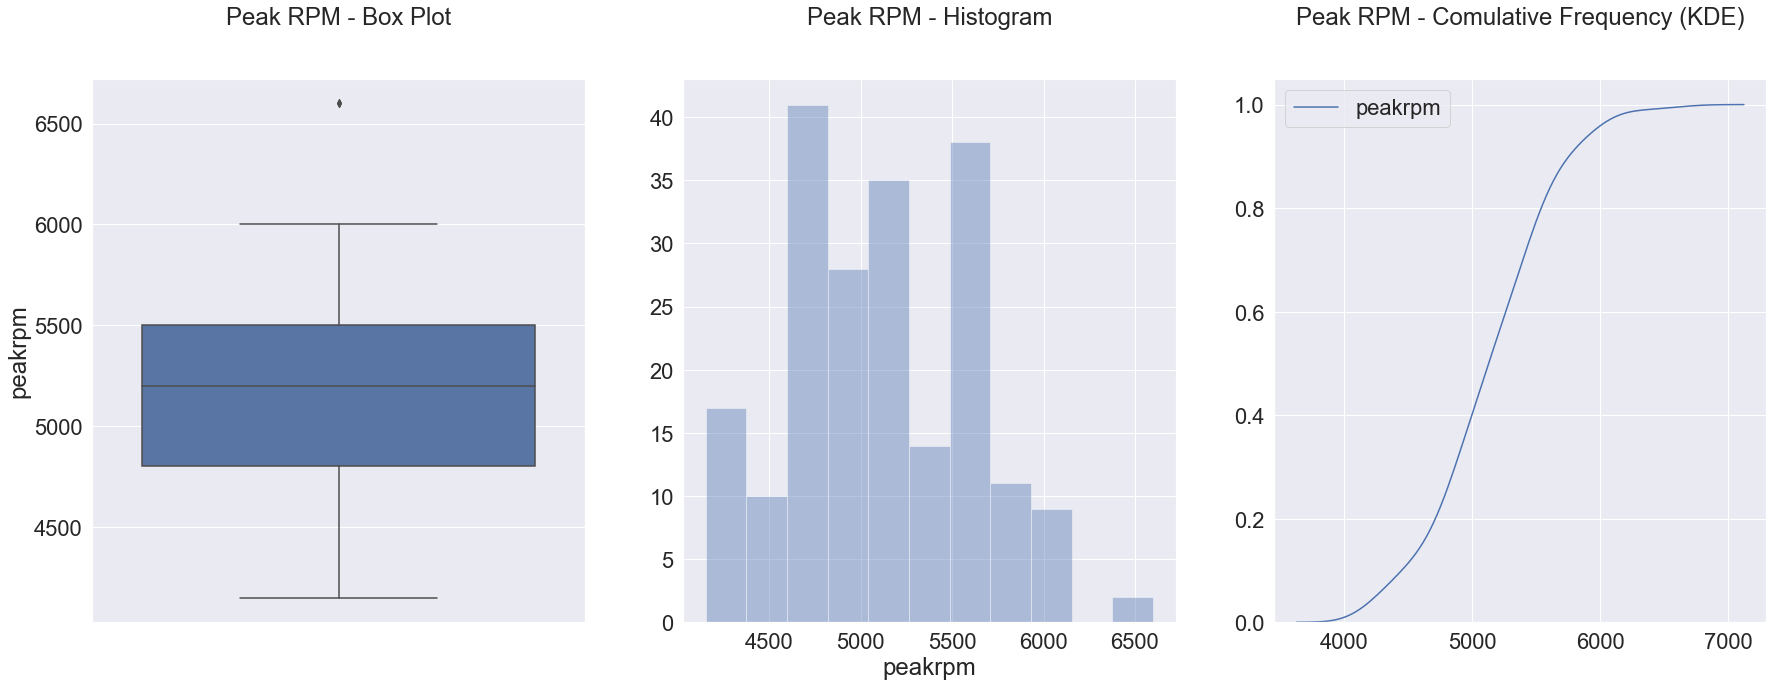

25th Percentile Peak RPM value is: 4800.0
75th Percentile Peak RPM value is: 5500.0
90th Percentile Peak RPM value is: 5780.0
95th Percentile Peak RPM value is: 5979.999999999998
Min Value (Box Plot) of Peak RPM is : 3750.0
Max Value (Box Plot) of Peak RPM is : 6550.0
Number of Lower Range Peak RPM Outliers: 0 (0.0%)
Number of Upper Range Peak RPM Outliers: 2 (0.98%)


/Users/stray/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


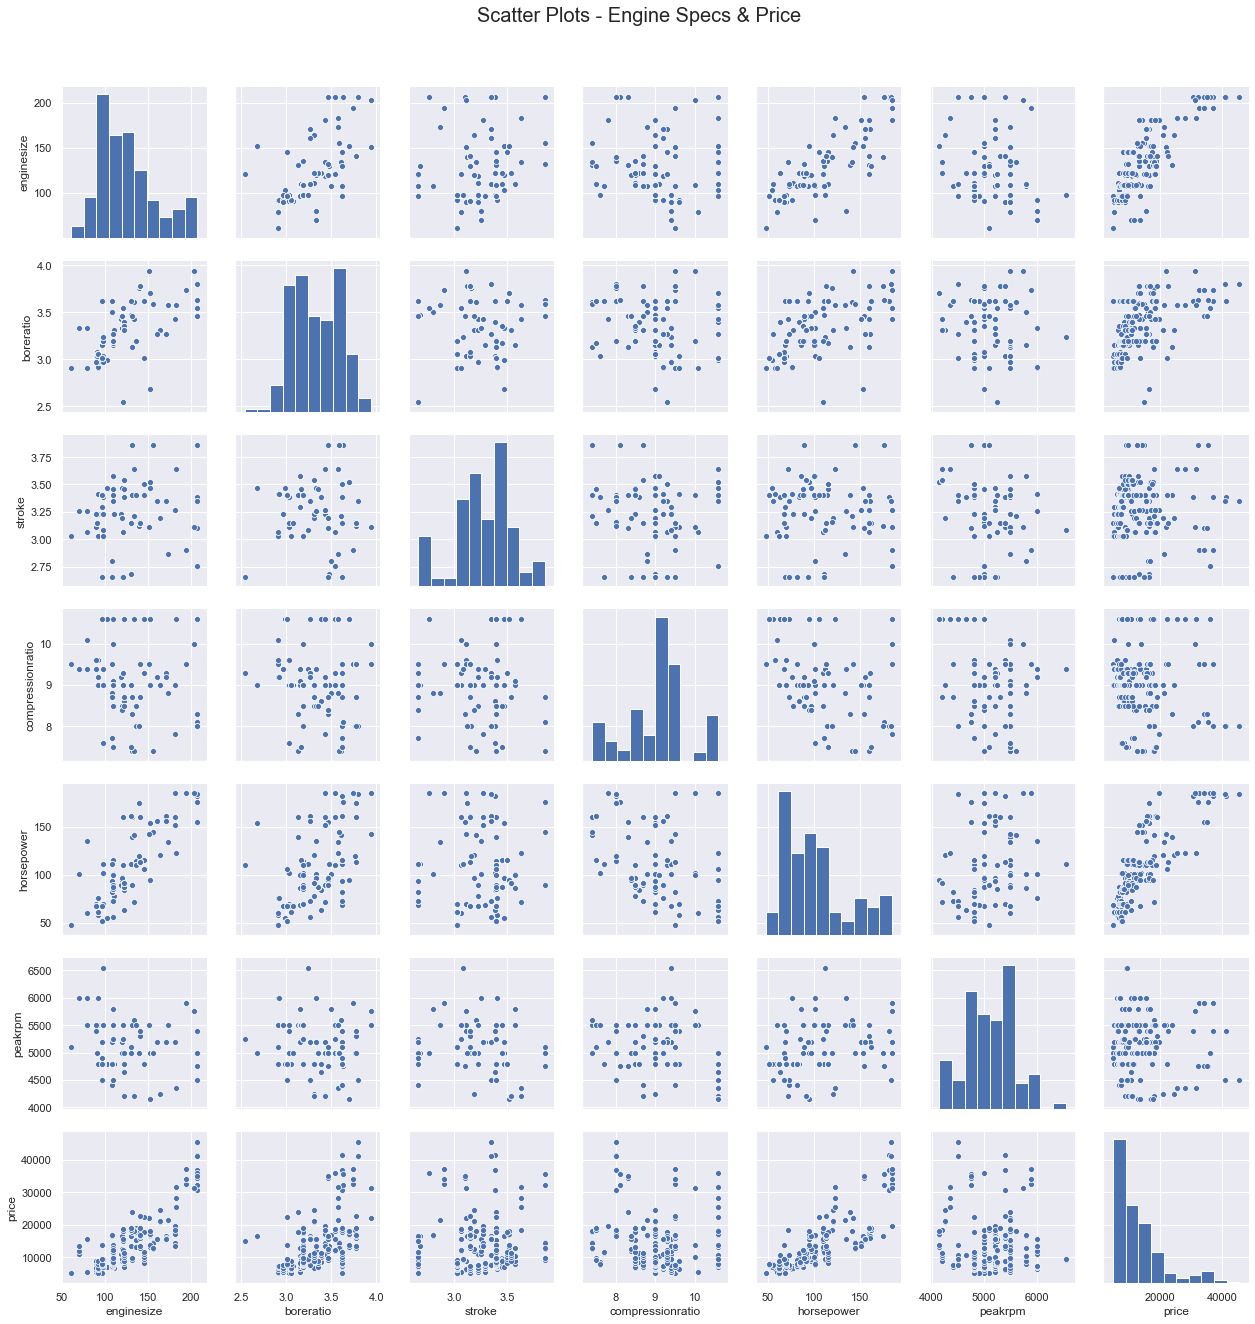

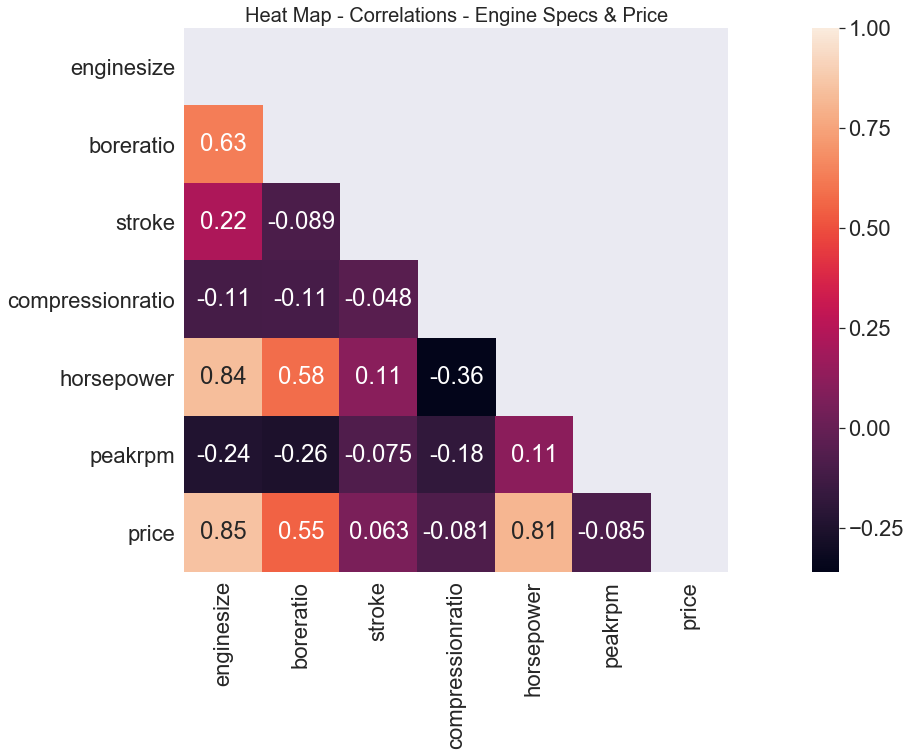

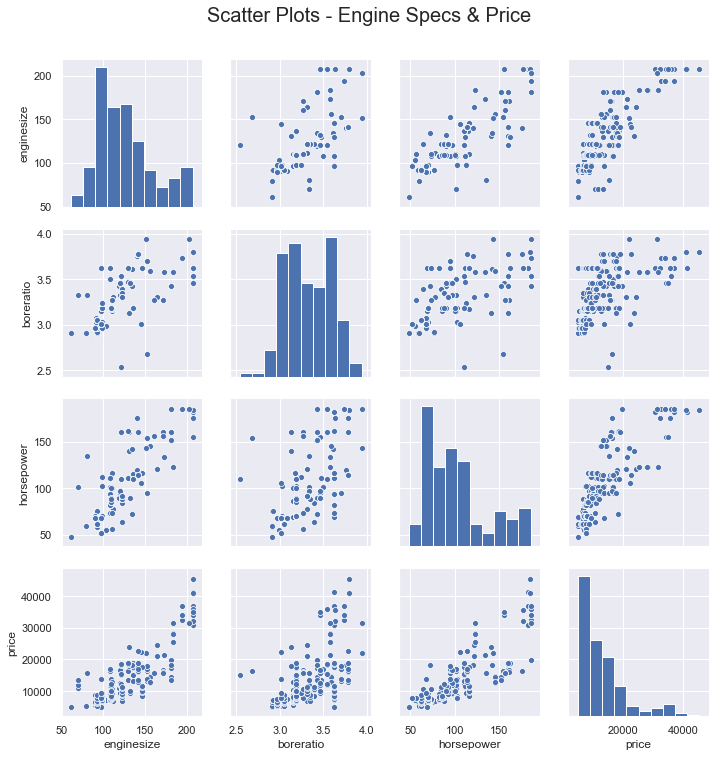

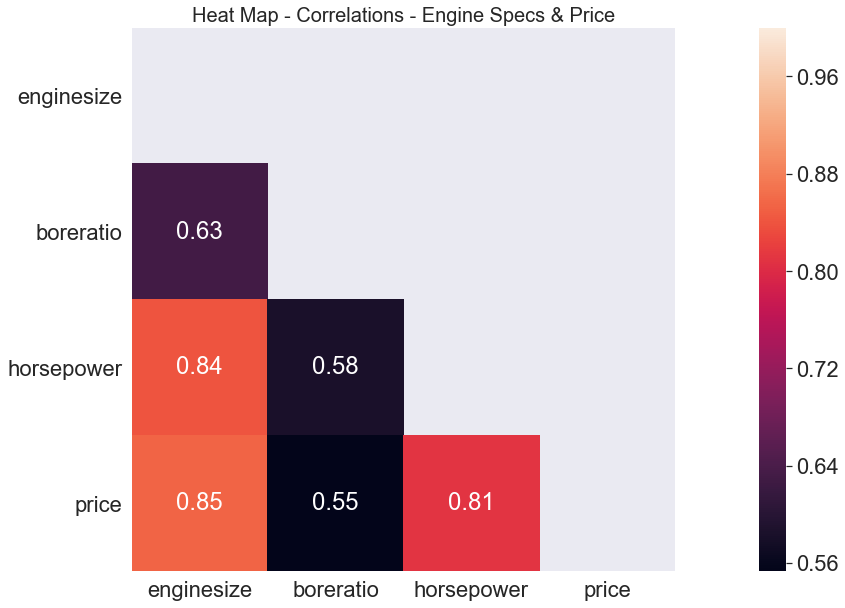

In [21]:
# univariate analysis / visualisation
sns.set(font_scale=2)

plt.subplot(1, 3, 1)
g = sns.boxplot(data["enginesize"], orient='v')
g.text(0.5, 1.1, "Engine Size - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 2)
g = sns.distplot(data["enginesize"], kde=False)
g.text(0.5, 1.1, "Engine Size - Histogram", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 3)
g = sns.kdeplot(data["enginesize"], cumulative=True)
g.text(0.5, 1.1, "Engine Size - Comulative Frequency (KDE)", size=24, ha="center", transform=g.transAxes)

plt.show()

p_25 = np.percentile(data["enginesize"], 25)
p_75 = np.percentile(data["enginesize"], 75)
IQR = p_75 - p_25
min_box = p_25 - 1.5*IQR
max_box = p_75 + 1.5*IQR
print('25th Percentile Engine Size value is: ' + str(p_25))
print('75th Percentile Engine Size value is: ' + str(p_75))
print('90th Percentile Engine Size value is: ' + str(np.percentile(data["enginesize"], 90)))
print('95th Percentile Engine Size value is: ' + str(np.percentile(data["enginesize"], 95)))
print('Min Value (Box Plot) of Engine Size is : ' + str(min_box))
print('Max Value (Box Plot) of Engine Size is : ' + str(max_box))
print('Number of Lower Range Engine Size Outliers: ' + str(len(data[data["enginesize"] < min_box]))
      + ' (' + str(np.round(len(data[data["enginesize"] < min_box])/len(data)*100,2)) +'%)')
print('Number of Upper Range Engine Size Outliers: ' + str(len(data[data["enginesize"] > max_box]))
      + ' (' + str(np.round(len(data[data["enginesize"] > max_box])/len(data)*100,2)) +'%)')

data["enginesize"][data["enginesize"] > max_box] = max_box # treat outliers

sns.set(font_scale=2)

plt.subplot(1, 3, 1)
g = sns.boxplot(data["boreratio"], orient='v')
g.text(0.5, 1.1, "Bore Ratio - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 2)
g = sns.distplot(data["boreratio"], kde=False)
g.text(0.5, 1.1, "Bore Ratio - Histogram", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 3)
g = sns.kdeplot(data["boreratio"], cumulative=True)
g.text(0.5, 1.1, "Bore Ratio - Comulative Frequency (KDE)", size=24, ha="center", transform=g.transAxes)

plt.show()

p_25 = np.percentile(data["boreratio"], 25)
p_75 = np.percentile(data["boreratio"], 75)
IQR = p_75 - p_25
min_box = p_25 - 1.5*IQR
max_box = p_75 + 1.5*IQR
print('25th Percentile Bore Ratio value is: ' + str(p_25))
print('75th Percentile Bore Ratio value is: ' + str(p_75))
print('90th Percentile Bore Ratio value is: ' + str(np.percentile(data["boreratio"], 90)))
print('95th Percentile Bore Ratio value is: ' + str(np.percentile(data["boreratio"], 95)))
print('Min Value (Box Plot) of Bore Ratio is : ' + str(min_box))
print('Max Value (Box Plot) of Bore Ratio is : ' + str(max_box))
print('Number of Lower Range Bore Ratio Outliers: ' + str(len(data[data["boreratio"] < min_box]))
      + ' (' + str(np.round(len(data[data["boreratio"] < min_box])/len(data)*100,2)) +'%)')
print('Number of Upper Range Bore Ratio Outliers: ' + str(len(data[data["boreratio"] > max_box]))
      + ' (' + str(np.round(len(data[data["boreratio"] > max_box])/len(data)*100,2)) +'%)')

sns.set(font_scale=2)

plt.subplot(1, 3, 1)
g = sns.boxplot(data["stroke"], orient='v')
g.text(0.5, 1.1, "Stroke - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 2)
g = sns.distplot(data["stroke"], kde=False)
g.text(0.5, 1.1, "Stroke - Histogram", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 3)
g = sns.kdeplot(data["stroke"], cumulative=True)
g.text(0.5, 1.1, "Stroke - Comulative Frequency (KDE)", size=24, ha="center", transform=g.transAxes)

plt.show()

p_25 = np.percentile(data["stroke"], 25)
p_75 = np.percentile(data["stroke"], 75)
IQR = p_75 - p_25
min_box = p_25 - 1.5*IQR
max_box = p_75 + 1.5*IQR
print('25th Percentile Stroke value is: ' + str(p_25))
print('75th Percentile Stroke value is: ' + str(p_75))
print('90th Percentile Stroke value is: ' + str(np.percentile(data["stroke"], 90)))
print('95th Percentile Stroke value is: ' + str(np.percentile(data["stroke"], 95)))
print('Min Value (Box Plot) of Stroke is : ' + str(min_box))
print('Max Value (Box Plot) of Stroke is : ' + str(max_box))
print('Number of Lower Range Stroke Outliers: ' + str(len(data[data["stroke"] < min_box]))
      + ' (' + str(np.round(len(data[data["stroke"] < min_box])/len(data)*100,2)) +'%)')
print('Number of Upper Range Stroke Outliers: ' + str(len(data[data["stroke"] > max_box]))
      + ' (' + str(np.round(len(data[data["stroke"] > max_box])/len(data)*100,2)) +'%)')

data["stroke"][data["stroke"] > max_box] = max_box # treat outliers
data["stroke"][data["stroke"] < min_box] = min_box # treat outliers

sns.set(font_scale=2)

plt.subplot(1, 3, 1)
g = sns.boxplot(data["compressionratio"], orient='v')
g.text(0.5, 1.1, "Compression Ratio - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 2)
g = sns.distplot(data["compressionratio"], kde=False)
g.text(0.5, 1.1, "Compression Ratio - Histogram", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 3)
g = sns.kdeplot(data["compressionratio"], cumulative=True)
g.text(0.5, 1.1, "Compression Ratio - Comulative Frequency (KDE)", size=24, ha="center", transform=g.transAxes)

plt.show()

p_25 = np.percentile(data["compressionratio"], 25)
p_75 = np.percentile(data["compressionratio"], 75)
IQR = p_75 - p_25
min_box = p_25 - 1.5*IQR
max_box = p_75 + 1.5*IQR
print('25th Percentile Compression Ratio value is: ' + str(p_25))
print('75th Percentile Compression Ratio value is: ' + str(p_75))
print('90th Percentile Compression Ratio value is: ' + str(np.percentile(data["compressionratio"], 90)))
print('95th Percentile Compression Ratio value is: ' + str(np.percentile(data["compressionratio"], 95)))
print('Min Value (Box Plot) of Compression Ratio is : ' + str(min_box))
print('Max Value (Box Plot) of Compression Ratio is : ' + str(max_box))
print('Number of Lower Range Compression Ratio Outliers: ' + str(len(data[data["compressionratio"] < min_box]))
      + ' (' + str(np.round(len(data[data["compressionratio"] < min_box])/len(data)*100,2)) +'%)')
print('Number of Upper Range Compression Ratio Outliers: ' + str(len(data[data["compressionratio"] > max_box]))
      + ' (' + str(np.round(len(data[data["compressionratio"] > max_box])/len(data)*100,2)) +'%)')

data["compressionratio"][data["compressionratio"] > max_box] = max_box # treat outliers
data["compressionratio"][data["compressionratio"] < min_box] = min_box # treat outliers

sns.set(font_scale=2)

plt.subplot(1, 3, 1)
g = sns.boxplot(data["horsepower"], orient='v')
g.text(0.5, 1.1, "Horsepower - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 2)
g = sns.distplot(data["horsepower"], kde=False)
g.text(0.5, 1.1, "Horsepower - Histogram", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 3)
g = sns.kdeplot(data["horsepower"], cumulative=True)
g.text(0.5, 1.1, "Horsepower - Comulative Frequency (KDE)", size=24, ha="center", transform=g.transAxes)

plt.show()

p_25 = np.percentile(data["horsepower"], 25)
p_75 = np.percentile(data["horsepower"], 75)
IQR = p_75 - p_25
min_box = p_25 - 1.5*IQR
max_box = p_75 + 1.5*IQR
print('25th Percentile Horsepower value is: ' + str(p_25))
print('75th Percentile Horsepower value is: ' + str(p_75))
print('90th Percentile Horsepower value is: ' + str(np.percentile(data["horsepower"], 90)))
print('95th Percentile Horsepower value is: ' + str(np.percentile(data["horsepower"], 95)))
print('Min Value (Box Plot) of Horsepower is : ' + str(min_box))
print('Max Value (Box Plot) of Horsepower is : ' + str(max_box))
print('Number of Lower Range Horsepower Outliers: ' + str(len(data[data["horsepower"] < min_box]))
      + ' (' + str(np.round(len(data[data["horsepower"] < min_box])/len(data)*100,2)) +'%)')
print('Number of Upper Range Horsepower Outliers: ' + str(len(data[data["horsepower"] > max_box]))
      + ' (' + str(np.round(len(data[data["horsepower"] > max_box])/len(data)*100,2)) +'%)')

data["horsepower"][data["horsepower"] > max_box] = max_box # treat outliers

sns.set(font_scale=2)

plt.subplot(1, 3, 1)
g = sns.boxplot(data["peakrpm"], orient='v')
g.text(0.5, 1.1, "Peak RPM - Box Plot", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 2)
g = sns.distplot(data["peakrpm"], kde=False)
g.text(0.5, 1.1, "Peak RPM - Histogram", size=24, ha="center", transform=g.transAxes)

plt.subplot(1, 3, 3)
g = sns.kdeplot(data["peakrpm"], cumulative=True)
g.text(0.5, 1.1, "Peak RPM - Comulative Frequency (KDE)", size=24, ha="center", transform=g.transAxes)

plt.show()

p_25 = np.percentile(data["peakrpm"], 25)
p_75 = np.percentile(data["peakrpm"], 75)
IQR = p_75 - p_25
min_box = p_25 - 1.5*IQR
max_box = p_75 + 1.5*IQR
print('25th Percentile Peak RPM value is: ' + str(p_25))
print('75th Percentile Peak RPM value is: ' + str(p_75))
print('90th Percentile Peak RPM value is: ' + str(np.percentile(data["peakrpm"], 90)))
print('95th Percentile Peak RPM value is: ' + str(np.percentile(data["peakrpm"], 95)))
print('Min Value (Box Plot) of Peak RPM is : ' + str(min_box))
print('Max Value (Box Plot) of Peak RPM is : ' + str(max_box))
print('Number of Lower Range Peak RPM Outliers: ' + str(len(data[data["peakrpm"] < min_box]))
      + ' (' + str(np.round(len(data[data["peakrpm"] < min_box])/len(data)*100,2)) +'%)')
print('Number of Upper Range Peak RPM Outliers: ' + str(len(data[data["peakrpm"] > max_box]))
      + ' (' + str(np.round(len(data[data["peakrpm"] > max_box])/len(data)*100,2)) +'%)')

data["peakrpm"][data["peakrpm"] > max_box] = max_box # treat outliers                
                
# visualise
sns.set(font_scale=1)
g = sns.pairplot(data[['enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'price']])
g.fig.suptitle("Scatter Plots - Engine Specs & Price", y=1.05, x=0.5, size=20, ha="center")
plt.show()

sns.set(font_scale=2)
corr = data[['enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'price']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
g = sns.heatmap(corr, mask=mask, square=True, annot=True)
g.set_title("Heat Map - Correlations - Engine Specs & Price", y=1.05, x=0.5, size=20, ha="center")
plt.show()

# remove stroke, compressionratio, and peakrpm
data.drop(["stroke", "compressionratio", "peakrpm"], inplace = True, axis = 1)

# visualise again post removal of non-predictors
sns.set(font_scale=1)
g = sns.pairplot(data[['enginesize', 'boreratio', 'horsepower', 'price']])
g.fig.suptitle("Scatter Plots - Engine Specs & Price", y=1.05, x=0.5, size=20, ha="center")
plt.show()

sns.set(font_scale=2)
corr = data[['enginesize', 'boreratio', 'horsepower', 'price']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
g = sns.heatmap(corr, mask=mask, square=True, annot=True)
g.set_title("Heat Map - Correlations - Engine Specs & Price", y=1.05, x=0.5, size=20, ha="center")
plt.yticks(rotation=0)
plt.show()

### Understand Mileage (citympg, highwaympg)
- Highway mileage highly and positively correlated with City mileage
- Hence, do not use city mileage
- Mileage, in general, significantly negatively correlated with price

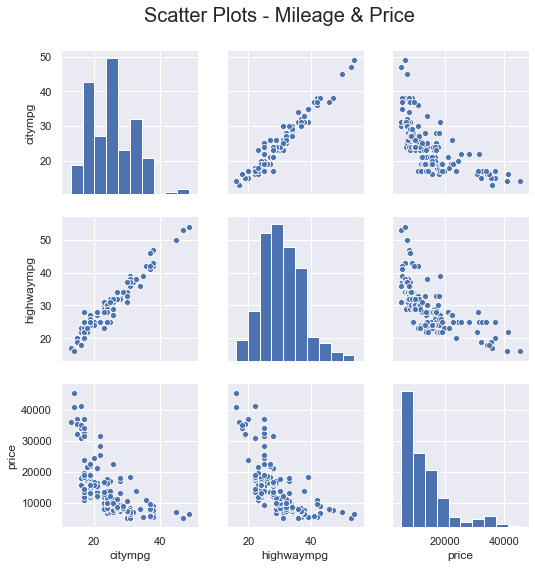

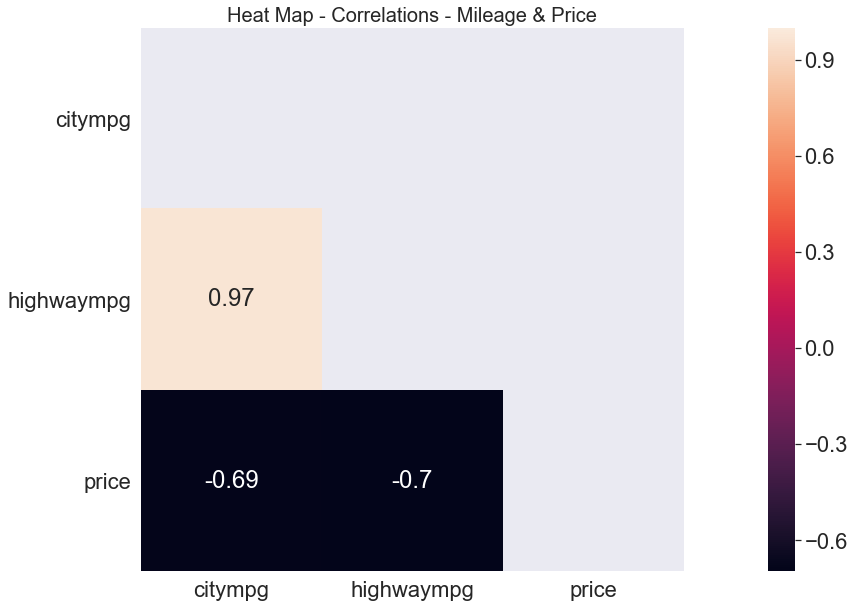

In [22]:
# visualise
sns.set(font_scale=1)
g = sns.pairplot(data[['citympg', 'highwaympg', 'price']])
g.fig.suptitle("Scatter Plots - Mileage & Price", y=1.05, x=0.5, size=20, ha="center")
plt.show()

sns.set(font_scale=2)
corr = data[['citympg', 'highwaympg', 'price']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
g = sns.heatmap(corr, mask=mask, square=True, annot=True)
g.set_title("Heat Map - Correlations - Mileage & Price", y=1.05, x=0.5, size=20, ha="center")
plt.yticks(rotation=0)
plt.show()

# drop citympg
data.drop("citympg", inplace = True, axis = 1)

### Treat multicategory categoricals

In [23]:
# Since dataset has categoricals, perform one-hot encoding
data_treated = pd.get_dummies(data, drop_first = True)
data_treated.head()

fueltype  aspiration  doornumber  wheelbase  carlength  carwidth  \
0         0           0           0       88.6      168.8      64.1   
1         0           0           0       88.6      168.8      64.1   
2         0           0           0       94.5      171.2      65.5   
3         0           0           1       99.8      176.6      66.2   
4         0           0           1       99.4      176.6      66.4   

   carheight  curbweight  cylindernumber  enginesize  boreratio  horsepower  \
0       48.8        2548               0         130       3.47         111   
1       48.8        2548               0         130       3.47         111   
2       52.4        2823               1         152       2.68         154   
3       54.3        2337               0         109       3.19         102   
4       54.3        2824               1         136       3.19         115   

   highwaympg    price  symboling_1  symboling_2  symboling_3  symboling_<0  \
0          27  13495.0            0            0            1             0   
1          27  16500.0            0            0            1             0   
2          26  16500.0            1            0            0             0   
3          30  13950.0            0            1            0             0   
4          22  17450.0            0            1            0             0   

   carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_fwd  \
0                  0              0              0               0   
1                  0              0              0               0   
2                  1              0              0               0   
3                  0              1              0               1   
4                  0              1              0               0   

   drivewheel_rwd  enginetype_l/rotor  enginetype_ohc  enginetype_ohcf  \
0               1                   0               0                0   
1               1                   0               0                0   
2               1                   0               0                0   
3               0                   0               1                0   
4               0                   0               1                0   

   enginetype_ohcv/dohcv  fuelsystem_2bbl  fuelsystem_idi/mfi/4bbl  \
0                      0                0                        0   
1                      0                0                        0   
2                      1                0                        0   
3                      0                0                        0   
4                      0                0                        0   

   fuelsystem_mpfi  fuelsystem_spfi/spdi  Brand_Group_Mid-Range  \
0                1                     0                      1   
1                1                     0                      1   
2                1                     0                      1   
3                1                     0                      1   
4                1                     0                      1   

   Brand_Group_Value  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [24]:
# Review variable distributions
data_treated.describe()

fueltype  aspiration  doornumber   wheelbase   carlength    carwidth  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.097561    0.180488    0.560976   98.710976  174.049268   65.884390   
std      0.297446    0.385535    0.497483    5.882586   12.337289    2.083114   
min      0.000000    0.000000    0.000000   86.600000  141.100000   60.300000   
25%      0.000000    0.000000    0.000000   94.500000  166.300000   64.100000   
50%      0.000000    0.000000    1.000000   97.000000  173.200000   65.500000   
75%      0.000000    0.000000    1.000000  102.400000  183.100000   66.900000   
max      1.000000    1.000000    1.000000  114.250000  208.100000   71.100000   

        carheight   curbweight  cylindernumber  enginesize   boreratio  \
count  205.000000   205.000000      205.000000  205.000000  205.000000   
mean    53.724878  2555.565854        0.200000  124.570732    3.329756   
std      2.443522   520.680204        0.400979   33.974343    0.270844   
min     47.800000  1488.000000        0.000000   61.000000    2.540000   
25%     52.000000  2145.000000        0.000000   97.000000    3.150000   
50%     54.100000  2414.000000        0.000000  120.000000    3.310000   
75%     55.500000  2935.000000        0.000000  141.000000    3.580000   
max     59.800000  4066.000000        1.000000  207.000000    3.940000   

       horsepower  highwaympg         price  symboling_1  symboling_2  \
count  205.000000  205.000000    205.000000   205.000000   205.000000   
mean   102.843902   30.751220  13276.710571     0.263415     0.156098   
std     35.578896    6.886443   7988.852332     0.441564     0.363836   
min     48.000000   16.000000   5118.000000     0.000000     0.000000   
25%     70.000000   25.000000   7788.000000     0.000000     0.000000   
50%     95.000000   30.000000  10295.000000     0.000000     0.000000   
75%    116.000000   34.000000  16503.000000     1.000000     0.000000   
max    185.000000   54.000000  45400.000000     1.000000     1.000000   

       symboling_3  symboling_<0  carbody_hatchback  carbody_sedan  \
count   205.000000    205.000000         205.000000     205.000000   
mean      0.131707      0.121951           0.341463       0.468293   
std       0.339000      0.328031           0.475361       0.500215   
min       0.000000      0.000000           0.000000       0.000000   
25%       0.000000      0.000000           0.000000       0.000000   
50%       0.000000      0.000000           0.000000       0.000000   
75%       0.000000      0.000000           1.000000       1.000000   
max       1.000000      1.000000           1.000000       1.000000   

       carbody_wagon  drivewheel_fwd  drivewheel_rwd  enginetype_l/rotor  \
count     205.000000      205.000000      205.000000          205.000000   
mean        0.121951        0.585366        0.370732            0.078049   
std         0.328031        0.493865        0.484183            0.268905   
min         0.000000        0.000000        0.000000            0.000000   
25%         0.000000        0.000000        0.000000            0.000000   
50%         0.000000        1.000000        0.000000            0.000000   
75%         0.000000        1.000000        1.000000            0.000000   
max         1.000000        1.000000        1.000000            1.000000   

       enginetype_ohc  enginetype_ohcf  enginetype_ohcv/dohcv  \
count      205.000000       205.000000             205.000000   
mean         0.721951         0.073171               0.068293   
std          0.449134         0.261054               0.252865   
min          0.000000         0.000000               0.000000   
25%          0.000000         0.000000               0.000000   
50%          1.000000         0.000000               0.000000   
75%          1.000000         0.000000               0.000000   
max          1.000000         1.000000               1.000000   

       fuelsystem_2bbl  fuelsystem_idi/mfi/4bbl  fue

In [25]:
# Get number of rows and columns for reference
data_treated.shape

(205, 33)

### Correlations - all remaining X Variables and Price

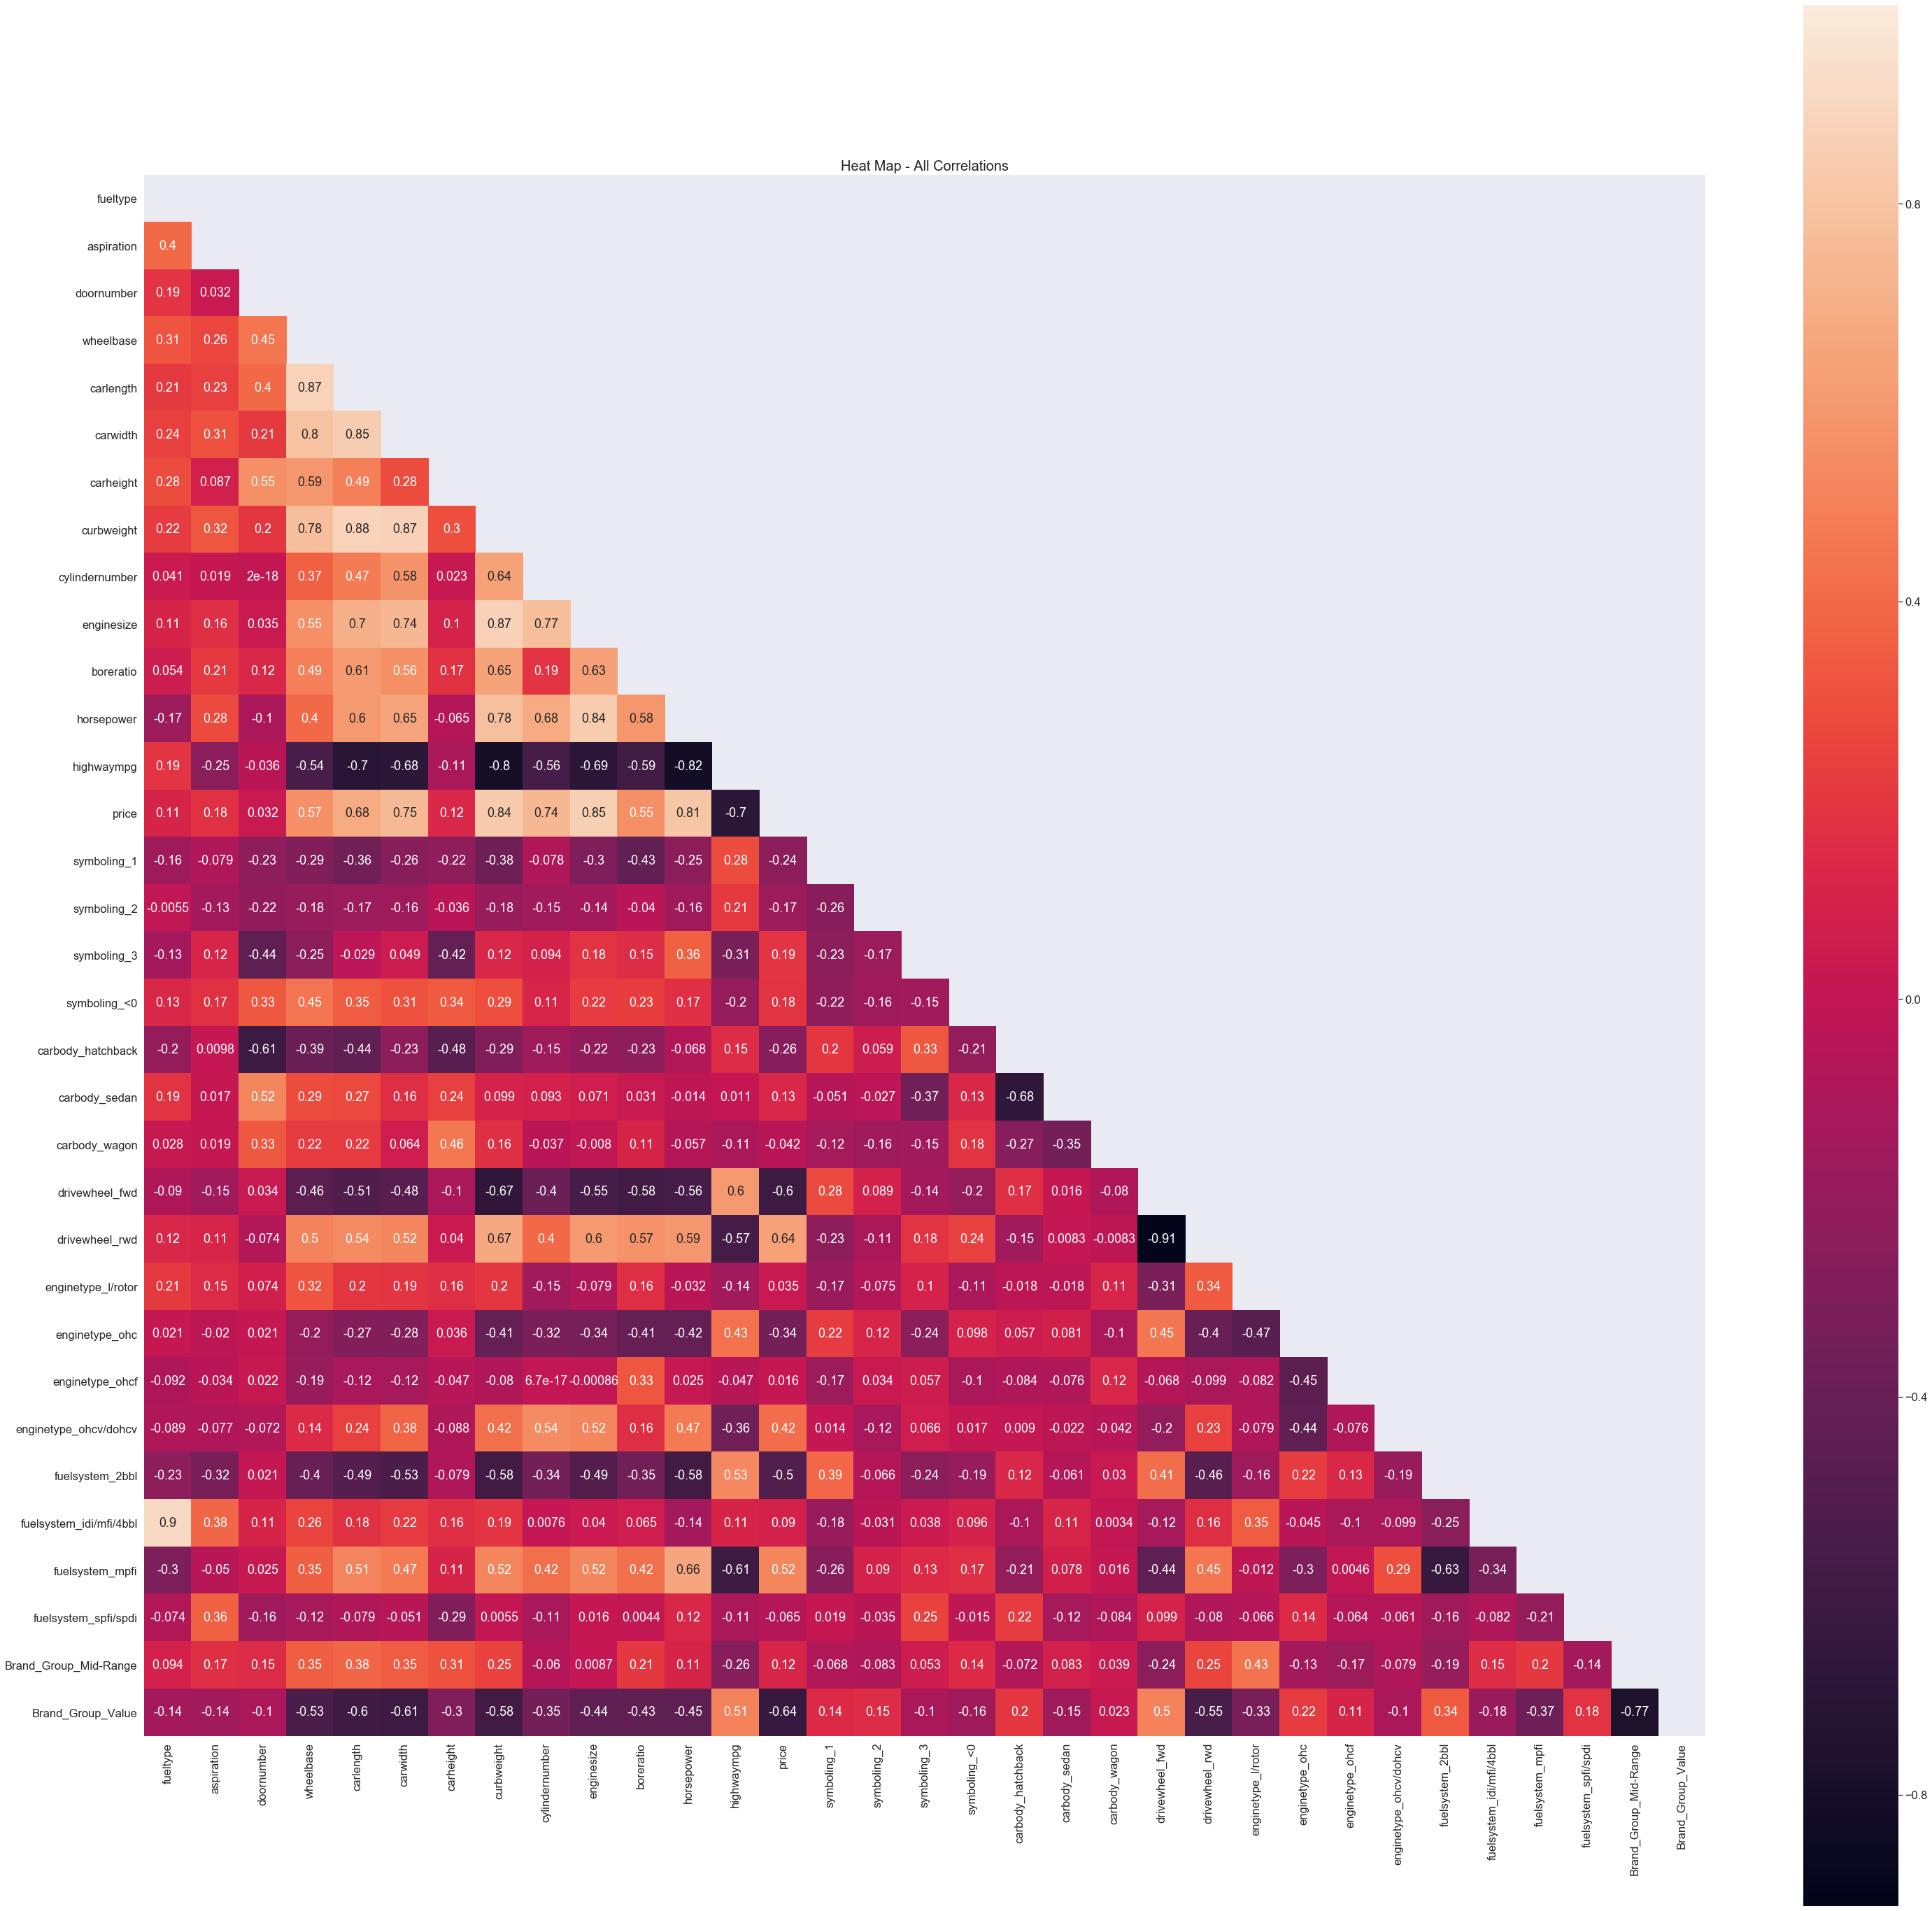

In [26]:
sns.set(rc={'figure.figsize':(50,50)})
sns.set(font_scale=1.5)
corr = data_treated.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
g = sns.heatmap(corr, mask=mask, square=True, annot=True)
g.set_title("Heat Map - All Correlations", y=1.05, x=0.5, size=20, ha="center")
plt.yticks(rotation=0)
plt.show()

### Get Training and Test Splits + Scale Numeric Variables
- Train: 70% random sample, Test: remaining 30%
- MinMaxScaler learned on Training dataset and fit on Test dataset

In [27]:
np.random.seed(0)
df_train, df_test = train_test_split(data_treated, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
        'enginesize','boreratio','horsepower','highwaympg', 'price']
scaler = MinMaxScaler()
df_train[vars] = scaler.fit_transform(df_train[vars])
df_test[vars] = scaler.transform(df_test[vars]) # using training dataset scaler on test directly

/Users/stray/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/stray/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/stray/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

### Use Recursive Feature Elimination procedure to zero-in on 10 key X Variables

In [29]:
y_train = df_train.pop('price')
X_train = df_train.astype(float)

In [30]:
#lm = LinearRegression(X_train, y_train)
lm = LinearRegression()
rfe = RFE(estimator = lm, n_features_to_select = 10)
rfe = rfe.fit(X_train, y_train)

# print summaries for the selection of attributes
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 7),
 ('aspiration', False, 22),
 ('doornumber', False, 18),
 ('wheelbase', False, 4),
 ('carlength', False, 6),
 ('carwidth', True, 1),
 ('carheight', False, 9),
 ('curbweight', True, 1),
 ('cylindernumber', False, 21),
 ('enginesize', False, 13),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('highwaympg', True, 1),
 ('symboling_1', False, 15),
 ('symboling_2', False, 19),
 ('symboling_3', False, 10),
 ('symboling_<0', False, 17),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 14),
 ('drivewheel_rwd', False, 23),
 ('enginetype_l/rotor', False, 12),
 ('enginetype_ohc', False, 8),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv/dohcv', False, 11),
 ('fuelsystem_2bbl', False, 16),
 ('fuelsystem_idi/mfi/4bbl', False, 5),
 ('fuelsystem_mpfi', False, 20),
 ('fuelsystem_spfi/spdi', False, 3),
 ('Brand_Group_Mid-Range', True, 1),
 ('Brand_Group_Value', True, 1)]

In [31]:
# keep only those variables that RFE deems important
X_train = X_train.iloc[:, list(rfe.support_)]

### Build Model 1
- R Squared is 0.937 and Adjusted R Squared is 0.932 - indicating that Price variance is well described by the model
- All Variables have p-value < 0.05
- Variable curbweight, however, has high VIF indicating multi-collinearily; so must remove this variable

In [32]:
X_train = sm.add_constant(X_train) # Add column for Intercept
lm = sm.OLS(y_train,X_train).fit() # Learn Linear Regression relationships
print(lm.summary()) # Print Model Stats

# Check VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [np.round(variance_inflation_factor(X_train.values, i), 2) for i in range(X_train.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     196.2
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           4.23e-74
Time:                        15:12:08   Log-Likelihood:                 214.57
No. Observations:                 143   AIC:                            -407.1
Df Residuals:                     132   BIC:                            -374.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

/Users/stray/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Build Model 2
- R Squared is 0.929 and Adjusted R Squared is 0.924 - indicating that Price variance is well described by the model
- highwaympg has p-value > 0.05, indicating low confidence in this variable; so must remove this variable

In [33]:
X_train = X_train.drop(["curbweight"], axis = 1) # Remove curbweight
lm = sm.OLS(y_train,X_train).fit() # Learn Linear Regression relationships
print(lm.summary()) # Print Model Stats

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     192.3
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           1.04e-71
Time:                        15:12:08   Log-Likelihood:                 205.69
No. Observations:                 143   AIC:                            -391.4
Df Residuals:                     133   BIC:                            -361.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

### Build Model 3
- R Squared is 0.928 and Adjusted R Squared is 0.923 - indicating that Price variance is well described by the model
- Variables boreratio has p-value > 0.05, indicating low confidence in the variable; so remove this

In [34]:
X_train = X_train.drop(["highwaympg"], axis = 1) # Remove highwaympg
lm = sm.OLS(y_train,X_train).fit() # Learn Linear Regression relationships
print(lm.summary()) # Print Model Stats

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     214.3
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           1.90e-72
Time:                        15:12:08   Log-Likelihood:                 204.59
No. Observations:                 143   AIC:                            -391.2
Df Residuals:                     134   BIC:                            -364.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

### Build Model 4
- R Squared is 0.926 and Adjusted R Squared is 0.922 - indicating that Price variance is well described by the model
- All variables have p-value < 0.05
- However, variable carbody_sedan has high VIF, indicating multi-collinearity; so remove this variable

In [35]:
X_train = X_train.drop(["boreratio"], axis = 1) # Remove boreratio
lm = sm.OLS(y_train,X_train).fit() # Learn Linear Regression relationships
print(lm.summary()) # Print Model Stats

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     239.8
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           7.00e-73
Time:                        15:12:08   Log-Likelihood:                 202.68
No. Observations:                 143   AIC:                            -389.4
Df Residuals:                     135   BIC:                            -365.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [36]:
# Check VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [np.round(variance_inflation_factor(X_train.values, i), 2) for i in range(X_train.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                Features    VIF
0                  const  48.56
4          carbody_sedan   6.12
3      carbody_hatchback   5.60
7      Brand_Group_Value   4.20
5          carbody_wagon   3.57
6  Brand_Group_Mid-Range   2.91
1               carwidth   2.78
2             horsepower   2.28


### Build Model 5
- R Squared is 0.922 and Adjusted R Squared is 0.918 - indicating that Price variance is well described by the model
- Variable carbody_wagon p-value > 0.05, indicating low confidence in the variable; so remove it

In [37]:
X_train = X_train.drop(["carbody_sedan"], axis = 1) # Remove carbody_sedan
lm = sm.OLS(y_train,X_train).fit() # Learn Linear Regression relationships
print(lm.summary()) # Print Model Stats

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     267.2
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           1.13e-72
Time:                        15:12:08   Log-Likelihood:                 199.16
No. Observations:                 143   AIC:                            -384.3
Df Residuals:                     136   BIC:                            -363.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

### Build Model 6
- R Squared is 0.922 and Adjusted R Squared is 0.919 - indicating that Price variance is well described by the model
- All variables have p-values < 0.05
- VIF for all variables is also < 5, indicating that we cannot assert multi-collinearity
- F Statstic is high with low p-value as well, indicating high confidence that Price variance explanation is not just chance

In [38]:
X_train = X_train.drop(["carbody_wagon"], axis = 1) # Remove carbody_wagon
lm = sm.OLS(y_train,X_train).fit() # Learn Linear Regression relationships
print(lm.summary()) # Print Model Stats

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     322.1
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           7.12e-74
Time:                        15:12:08   Log-Likelihood:                 198.98
No. Observations:                 143   AIC:                            -386.0
Df Residuals:                     137   BIC:                            -368.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [39]:
# Check VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [np.round(variance_inflation_factor(X_train.values, i), 2) for i in range(X_train.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                Features    VIF
0                  const  36.03
5      Brand_Group_Value   4.04
4  Brand_Group_Mid-Range   2.89
1               carwidth   2.56
2             horsepower   2.17
3      carbody_hatchback   1.10


### Business Interpretation of Model 6
- Car Price is explained by:
    - Car's brand
    - Horsepower of car's engine
    - Car's width (physical size / dimension)
    - Car type (e.g. Hatchback / Sedan / etc.)
    
    
- Value brands are cheap - this makes business sense; coefficient for this variable is -0.3243
- Higher the Horsepower, the more expensive it should be to manufacture it, as the engine technology would be better, and this would reflect in higher price as well; this makes business sense; coefficient for this variable is +0.3136 
- Higher the Carwidth, the more expensive it should be to manufacture it, and this would reflect in higher price as well; this makes business sense; coefficient for this variable is +0.2719 
- If a car is made by a Mid-Range brand rather than High-End brand, it would be cheaper - this makes _some_ business sense; Brand is of-course not the only predictor of price, other features matter; coefficient for this variable is -0.2676
- Hatchback cars are cheaper than other cars; this makes business sense; coefficienbt for this variable is -0.0343

### Residuals analysis
- Errors are normally distributed with mean ~0
- Errors are independent and homoscedasticity principle is not violated (no evidence of systematic increase / decrease in error variance)

/Users/stray/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


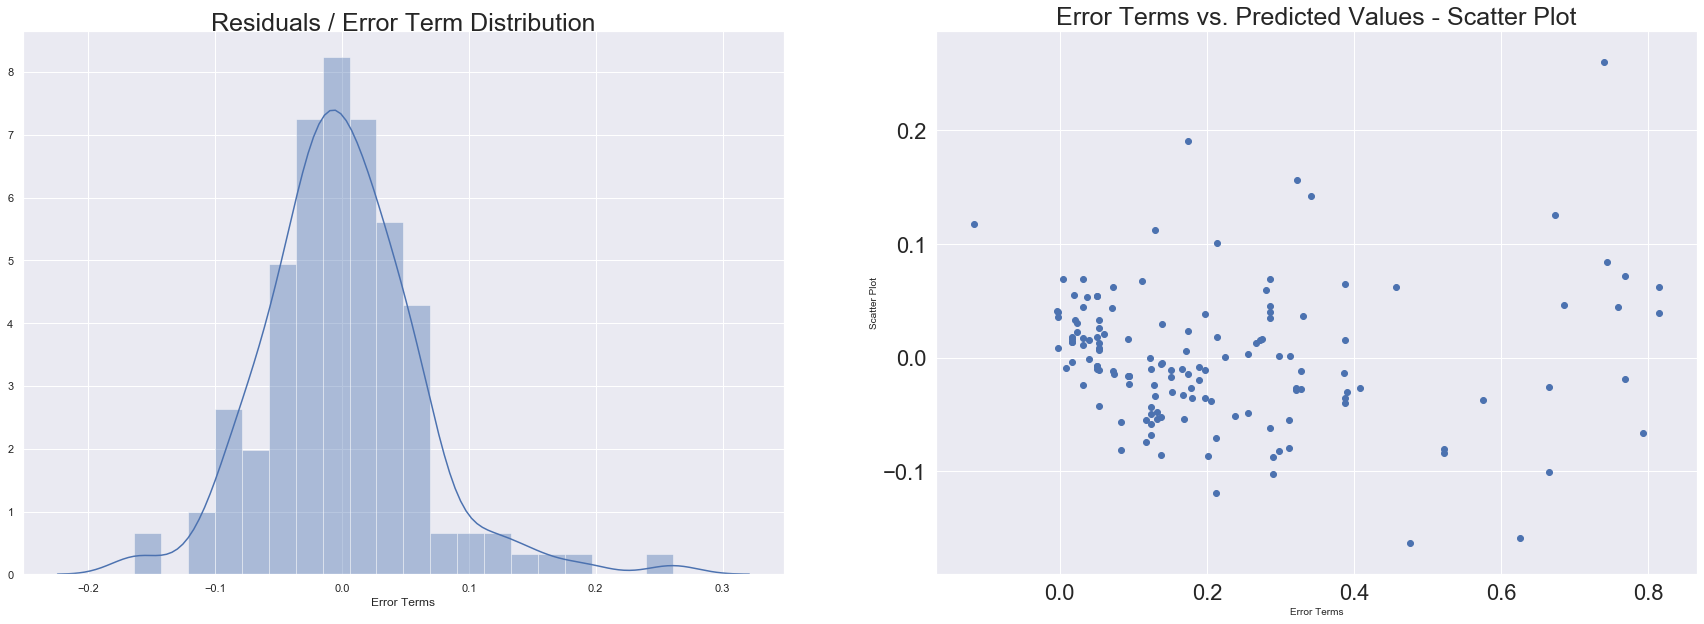

Mean of Residuals is: 2.9114240156254105e-18


In [40]:
y_train_pred = lm.predict(X_train)
error_term = pd.Series(y_train - y_train_pred, name="Error Terms")

sns.set(rc={'figure.figsize':(30,10)})

# Check that errors are normally distributed (using histogram visualisation)
plt.subplot(1, 2, 1)

sns.set(font_scale=2)
g = sns.distplot(error_term, bins = 20, label = "Error Terms")
g.text(0.5, 1, "Residuals / Error Term Distribution", size=25, ha="center", transform=g.transAxes)

# Check that errors are independent (randomly distributed / not correlated) and they demonstrate homoscedasticity (no unequal variance) 
plt.subplot(1, 2, 2)

plt.scatter(y_train_pred, error_term)
plt.title('Error Terms vs. Predicted Values - Scatter Plot', size =25)
plt.xlabel('Error Terms', size=10)
plt.ylabel('Scatter Plot', size=10)

plt.show()

# Check that mean of error terms is ~0
print('Mean of Residuals is: ' + str(error_term.mean()))

### Validate model fit using Test dataset
- Model delivers an R-Squared of 0.9029 for the test dataset, providing confidence that it explains price variance in an out-of-sample dataset as well and therefore generalises well
- Errors normally distributed around mean ~0
- Errors independent and homoscedasticity principle not violated in test dataset as well (no evidence of systematic increase or decrease in error variance)

R-Squared for Test Dataset is: 0.9028873760294946


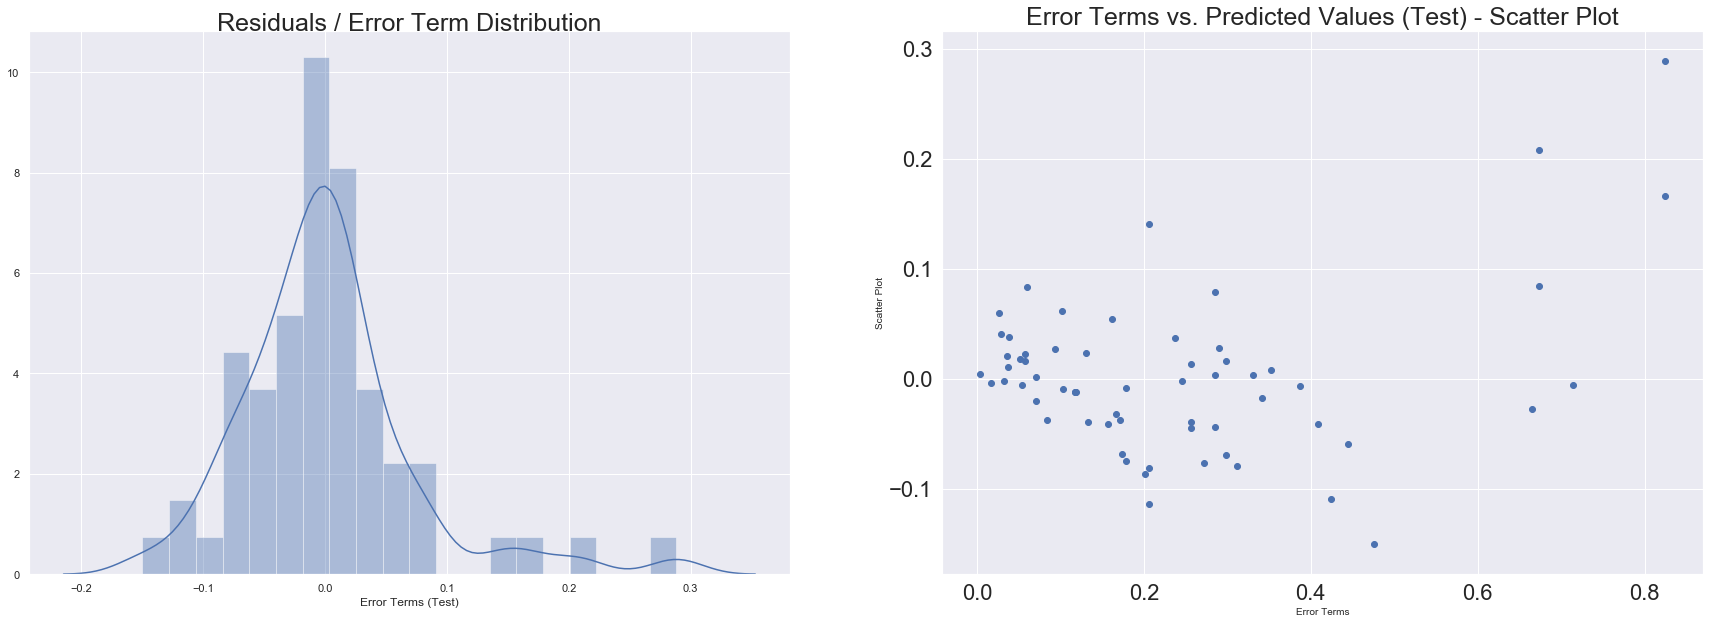

Mean of Residuals is: 0.001397086956452663


In [41]:
### Predict Price (target variable) for Test dataset

y_test = df_test.pop('price') # note that variables already scaled
X_test = sm.add_constant(df_test) # add intercept column
X_test = X_test[list(X_train.columns.values)] # keep only variables required for prediction
y_test_pred = lm.predict(X_test)

from sklearn.metrics import r2_score
print('R-Squared for Test Dataset is: ' + str(r2_score(y_test, y_test_pred)))


### Residual Analysis for Test Dataset

error_term_test = pd.Series(y_test - y_test_pred, name="Error Terms (Test)")

sns.set(rc={'figure.figsize':(30,10)})

# Check that errors are normally distributed (using histogram visualisation)
plt.subplot(1, 2, 1)

sns.set(font_scale=2)
g = sns.distplot(error_term_test, bins = 20, label = "Error Terms (Test)")
g.text(0.5, 1, "Residuals / Error Term Distribution", size=25, ha="center", transform=g.transAxes)

# Check that errors are independent (randomly distributed / not correlated) and they demonstrate homoscedasticity (no unequal variance) 
plt.subplot(1, 2, 2)

plt.scatter(y_test_pred, error_term_test)
plt.title('Error Terms vs. Predicted Values (Test) - Scatter Plot', size =25)
plt.xlabel('Error Terms', size=10)
plt.ylabel('Scatter Plot', size=10)

plt.show()

# Check that mean of error terms is ~0
print('Mean of Residuals is: ' + str(error_term_test.mean()))